In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [81]:
from museotoolbox.ai import SuperLearner
from museotoolbox.cross_validation import RandomStratifiedKFold
from museotoolbox.charts import PlotConfusionMatrix
from museotoolbox import datasets
from sklearn.ensemble import RandomForestClassifier

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from mlxtend.evaluate import accuracy_score
from sklearn.metrics import balanced_accuracy_score


from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Read the data 

In [85]:
df = pd.read_csv('Data_feature_selection.csv', sep = ',')
df.head()

,name,Permeability coefficient,Canonical SMILES,glide rotatable bonds,docking score,glide ligand efficiency,glide ligand efficiency sa,glide ligand efficiency ln,glide gscore,glide lipo,...,A:82(ARG) HAccep nc,A:82(ARG) Salt,Charge_+,Charge_+ +,Charge_+ - -,Charge_+ - - -,Charge_-,Charge_- -,Charge_neutral,Charge_±
0,Ampcillin,45,O=C([C@@H](c1ccccc1)[NH3+])N[C@@H]2C(N3[C@H](C...,0.205137,-2.074867,-0.937026,-1.365590,-1.914974,-2.074867,0.954845,...,0,0,0,0,0,0,0,0,0,1
1,4-43,165,O=C(C(C(C)C)[NH3+])OCC(CO)OCn1cnc2c1N=C(NC2=O)N,2.152902,-2.794854,-1.145318,-1.721748,-2.521296,-2.794854,0.618017,...,0,0,1,0,0,0,0,0,0,0
2,4-45,141,O=C(C(C(C)C)[NH3+])OCCOCn1cnc2c1N=C(NC2=O)N,1.373796,-2.471062,-1.323541,-1.805681,-2.364384,-2.471062,1.204105,...,0,0,1,0,0,0,0,0,0,0
3,4-28a,894,O=C(NC1C([NH3+])C=C(C(NCC[NH3+])=O)CC1OC(CC)CC)C,2.152902,-2.709729,-1.454611,-1.979815,-2.592882,-2.709729,0.380416,...,0,0,0,1,0,0,0,0,0,0
4,4-55a,23,O=C(C[NH3+])OC1C2OCC(C2OC1)[NH3+],-0.573969,-0.500403,-2.287590,-2.026428,-1.238487,-0.500403,0.367890,...,0,0,0,1,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

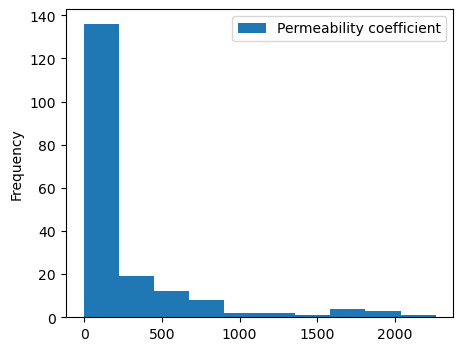

In [86]:
ax = df.plot.hist(column=["Permeability coefficient"], figsize=(5, 4))
ax

## Classification

In [87]:
class_table = pd.read_csv('mixed_data(to_work)_for docking.csv', sep = ',')
class_table.head()

,Canonical SMILES,Charge,name,Permeability coefficient,Accum_class
0,COc1ccc(CC2N(CCC34C2CC(C(C4)[NH3+])O)C)c3c1O,+,4-2,1913.0,High
1,OC12C(CC3(C2)C(c4c(C3CC1)cccc4C)CC[NH3+])=C,+,4-3,1887.0,High
2,O=C1C2(CC3(C1)C(c4c(C3CC2)cccc4C)C[NH3+])C,+,4-3a,1696.0,High
3,OC12C(CC3(C2)C(c4c(C3CC1)cccc4C)C[NH3+])C,+,4-4,1650.0,High
4,O=C1C2(CC3(C1)C(c4c(C3CC2)cccc4C)C[NH3+])CO,+,4-6,1487.0,High


In [88]:
class_table['Accum_class'].unique().tolist()


['High', 'Low']

In [89]:
df['Permiation'] = 0

In [90]:
for ind in df.index:
    name = df.loc[ind, 'name']
    labels = class_table[class_table['name'] == name]
    #print(name)
    ind_numb = list(labels.index)
    accum_class = labels.loc[ ind_numb[0], 'Accum_class']
    #print(accum_class)
    if accum_class == 'Low':
        df.loc[ind, 'Permiation'] = 0
    if accum_class == 'High':
        df.loc[ind, 'Permiation'] = 1
    

In [91]:
df

,name,Permeability coefficient,Canonical SMILES,glide rotatable bonds,docking score,glide ligand efficiency,glide ligand efficiency sa,glide ligand efficiency ln,glide gscore,glide lipo,...,A:82(ARG) Salt,Charge_+,Charge_+ +,Charge_+ - -,Charge_+ - - -,Charge_-,Charge_- -,Charge_neutral,Charge_±,Permiation
0,Ampcillin,45,O=C([C@@H](c1ccccc1)[NH3+])N[C@@H]2C(N3[C@H](C...,0.205137,-2.074867,-0.937026,-1.365590,-1.914974,-2.074867,0.954845,...,0,0,0,0,0,0,0,0,1,0
1,4-43,165,O=C(C(C(C)C)[NH3+])OCC(CO)OCn1cnc2c1N=C(NC2=O)N,2.152902,-2.794854,-1.145318,-1.721748,-2.521296,-2.794854,0.618017,...,0,1,0,0,0,0,0,0,0,0
2,4-45,141,O=C(C(C(C)C)[NH3+])OCCOCn1cnc2c1N=C(NC2=O)N,1.373796,-2.471062,-1.323541,-1.805681,-2.364384,-2.471062,1.204105,...,0,1,0,0,0,0,0,0,0,0
3,4-28a,894,O=C(NC1C([NH3+])C=C(C(NCC[NH3+])=O)CC1OC(CC)CC)C,2.152902,-2.709729,-1.454611,-1.979815,-2.592882,-2.709729,0.380416,...,0,0,1,0,0,0,0,0,0,1
4,4-55a,23,O=C(C[NH3+])OC1C2OCC(C2OC1)[NH3+],-0.573969,-0.500403,-2.287590,-2.026428,-1.238487,-0.500403,0.367890,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,4-29,344,[NH3+]C(C1CCCCC1)C(N2CCOCC2)C,-0.573969,1.262984,-0.242108,0.113876,0.826864,1.262984,-2.017032,...,0,1,0,0,0,0,0,0,0,1
184,3-52,28,O=C(OC)[C@H]1c2c(C)cccc2[C@@H]2[C@@]31CC(=O)[C...,-0.963522,1.219905,0.597061,0.799627,1.114245,1.219905,-0.935444,...,0,0,0,0,0,0,0,1,0,0
185,3-48,86,O=C(OC)[C@H]1c2c(C)cccc2[C@@H]2[C@@]31CC(=O)[C...,-0.184416,1.365451,0.780311,0.994968,1.294846,1.365451,-0.248473,...,0,0,0,0,0,0,0,1,0,0
186,2-92,29,O=C(OC)[C@H]1[C@@H]2[C@@](C(=O)OC)(C)[C@@H]3O[...,0.205137,1.778487,1.351917,1.613316,1.840802,1.778487,0.921911,...,0,0,0,0,0,0,0,1,0,0


In [92]:
df.shape

(188, 112)

# PCA

Shape before PCA:  (188, 108)
Shape after PCA:  (188, 2)


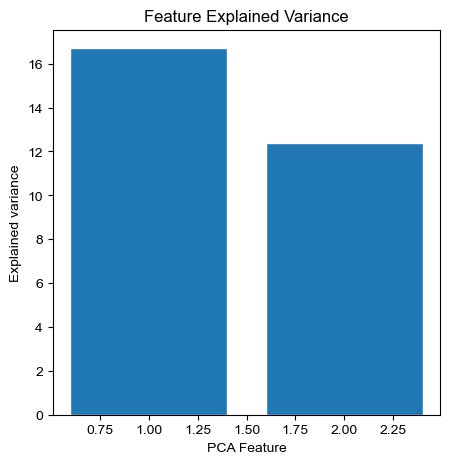

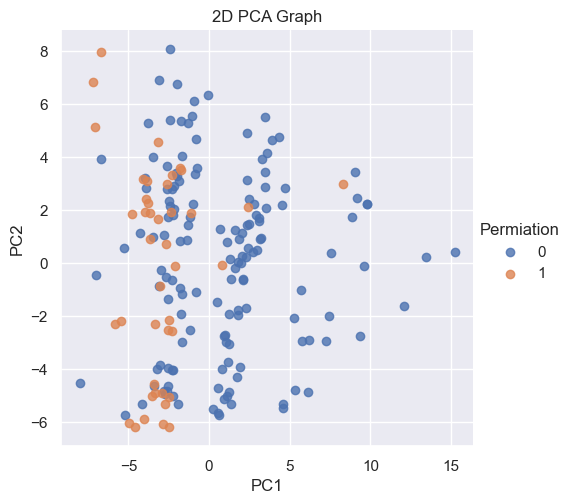

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
 
pca_features = pca.fit_transform(df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1))
 
print('Shape before PCA: ', df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1).shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

fig, ax = plt.subplots(figsize = (5,5))
 
from sklearn.decomposition import PCA
sns.set()

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_, 
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

pca_df['Permiation'] = df['Permiation']

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='Permiation', 
    fit_reg=False, 
    legend=True
    )
plt.title('2D PCA Graph')
plt.show()

# Train/test split 

In [93]:
#regression model

X_reg = df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1)
Y_reg = df['Permeability coefficient']

### For regression check filter methods like

* correlation with target
* pairwise correlation

In [94]:
#classification model

X_class = df.drop(['Permeability coefficient', 'Canonical SMILES', 'name', 'Permiation'], axis= 1)
Y_class = df['Permiation']

# Model with and without cross validation

### Classifiers

In [95]:
models = [['SVM', svm.SVC()], 
          ['Random Forest', RandomForestClassifier(random_state=42)], 
          ['Decision Tree', DecisionTreeClassifier(random_state=42)], 
          ['KNeighbors', KNeighborsClassifier()],
          ['LogisticRegression', LogisticRegression(random_state=42)]
          ]

## Without cross validation
### choosing best test size

In [96]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split

dict_test_train = {}
for test_size_x in [0.1, 0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        #print(name)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        f1_score_all = round(f1_score(y_test, preds, average='weighted'), 3)
        accuracy_all = round(accuracy_score(y_test, preds), 3)
        ROC_all = round(roc_auc_score(y_test, preds), 3)
        f1_score_all_f1 = round(f1_score(y_test, preds), 3)
        precision_all = round(precision_score(y_test, preds, average='weighted'), 3)

        dict_test_train[name + "_" + str(test_size_x)] = f1_score_all, accuracy_all, ROC_all, f1_score_all_f1, precision_all

        
        #print(f1_score_all, accuracy_all, ROC_all, f1_score_all_f1, precision_all)
        #print(classification_report(y_test, preds))

#dict_test_train

train_test = pd.DataFrame.from_dict(dict_test_train, orient='index',
                       columns=[ 'f1_weighted', 'accuracy', 'roc_auc', 'f1', 'precision'])

new_train_test = train_test.rename_axis('Method').reset_index()

melt_train_test = pd.melt(
    new_train_test, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted', 'accuracy', 'roc_auc', 'f1', 'precision'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_train_test.head(7)

,Method,metrics,score
0,SVM_0.1,f1_weighted,0.833
1,Random Forest_0.1,f1_weighted,0.761
2,Decision Tree_0.1,f1_weighted,0.895
3,KNeighbors_0.1,f1_weighted,0.684
4,LogisticRegression_0.1,f1_weighted,0.722
5,SVM_0.22,f1_weighted,0.807
6,Random Forest_0.22,f1_weighted,0.820


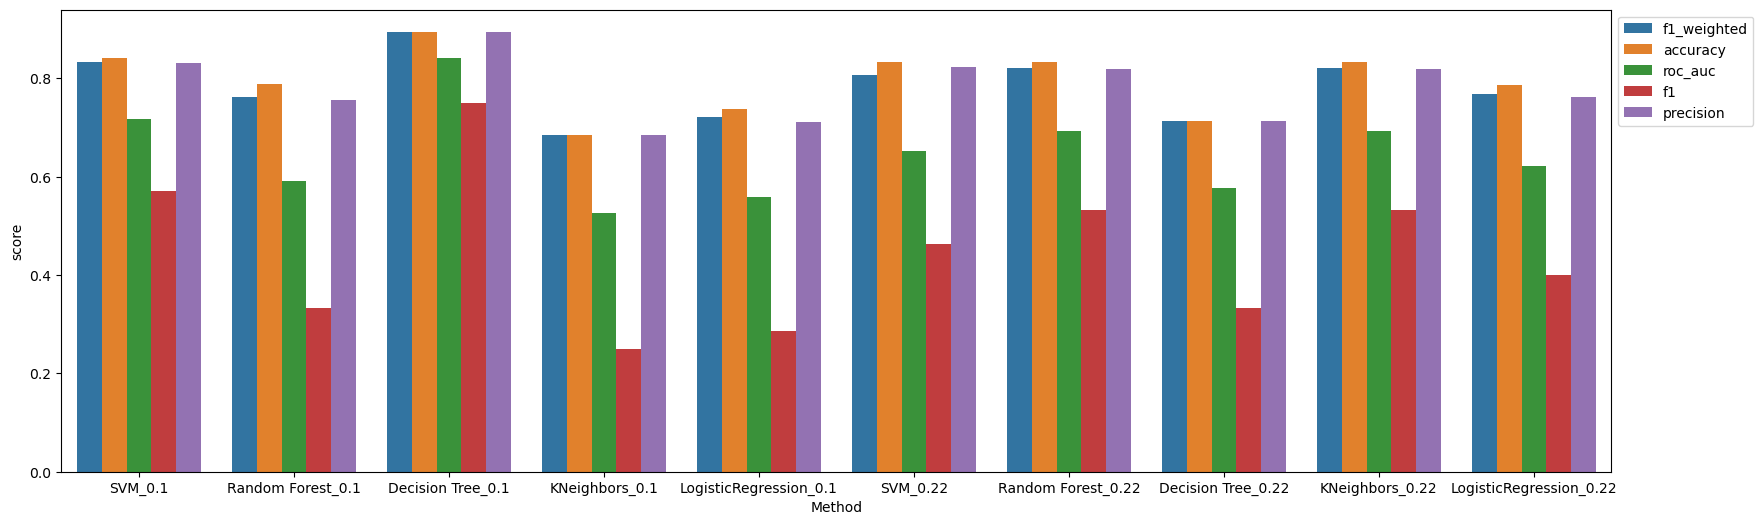

In [97]:
plt.rcParams["figure.figsize"] = [20,6]
sns.barplot(melt_train_test, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()          

#### With cross fold validation

In [98]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_class, Y_class)

5

In [99]:
my_dictionary = {}
metrics = ['f1_weighted', 'accuracy', 'roc_auc', 'f1']

for name, model in models:
    
    scores = cross_validate(model, X_class, Y_class, cv=skf, scoring=metrics)

    dict_list = []
    for type_score in ['test_f1_weighted', 'test_accuracy', 'test_roc_auc', 'test_f1']:
        variable = round(scores[type_score].mean(), 3) 
        dict_list.append(variable)


    my_dictionary[name + "_"  + 'cross_val(5)'] = dict_list

cross_val = pd.DataFrame.from_dict(my_dictionary, orient='index',
                       columns=['f1_weighted', 'accuracy', 'roc_auc', 'f1'])

new_cross_val = cross_val.rename_axis('Method').reset_index()

melt_cross_val = pd.melt(
    new_cross_val, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted','accuracy', 'roc_auc', 'f1'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_cross_val.head(7)

,Method,metrics,score
0,SVM_cross_val(5),f1_weighted,0.713
1,Random Forest_cross_val(5),f1_weighted,0.745
2,Decision Tree_cross_val(5),f1_weighted,0.712
3,KNeighbors_cross_val(5),f1_weighted,0.753
4,LogisticRegression_cross_val(5),f1_weighted,0.780
5,SVM_cross_val(5),accuracy,0.756
6,Random Forest_cross_val(5),accuracy,0.767


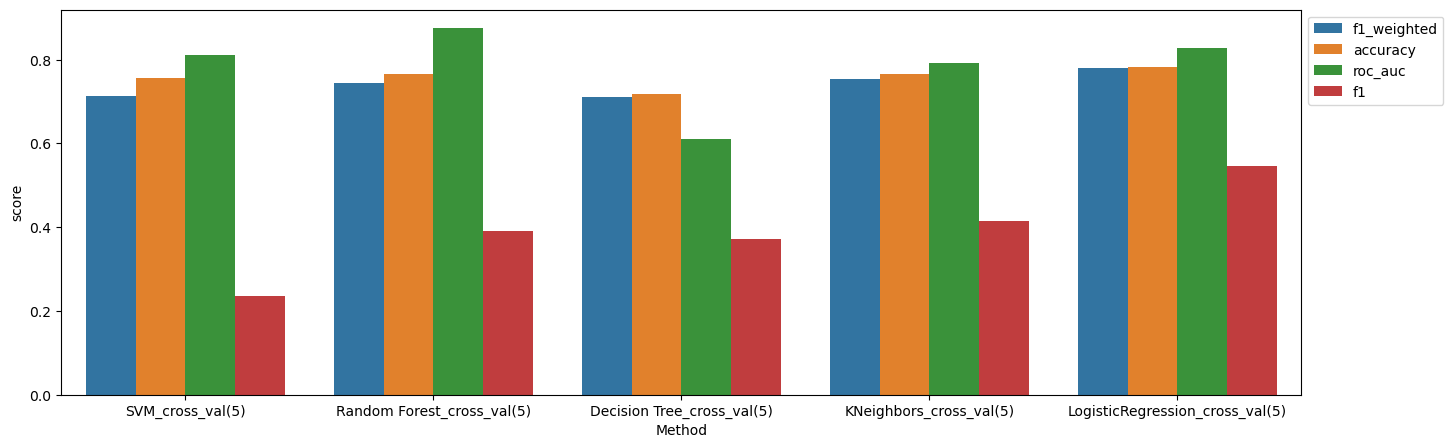

In [100]:
plt.rcParams["figure.figsize"] = [16,5]
sns.barplot(melt_cross_val, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Confusion matrix for cross validation (each fold)

In [101]:
X_class_numpy = X_class.to_numpy()
Y_class_numpy = Y_class.to_numpy()

In [102]:
from museotoolbox.cross_validation import RandomStratifiedKFold
RSKF = RandomStratifiedKFold(n_splits=3,
                random_state=42,verbose=False)

In [103]:
SL = SuperLearner(classifier=DecisionTreeClassifier(random_state=42), param_grid=dict(max_depth=[10,100]) )
SL.fit(X_class_numpy, Y_class_numpy, cv=RSKF) 

In [104]:
cms = []
for stats in SL.get_stats_from_cv(confusion_matrix=True):
    cms.append(stats['confusion_matrix'])
    print(stats['confusion_matrix'])

[[39  9]
 [ 8  6]]
[[42  6]
 [10  4]]
[[38 10]
 [ 5  9]]


Text(0.5, 1.0, 'AVERAGE')

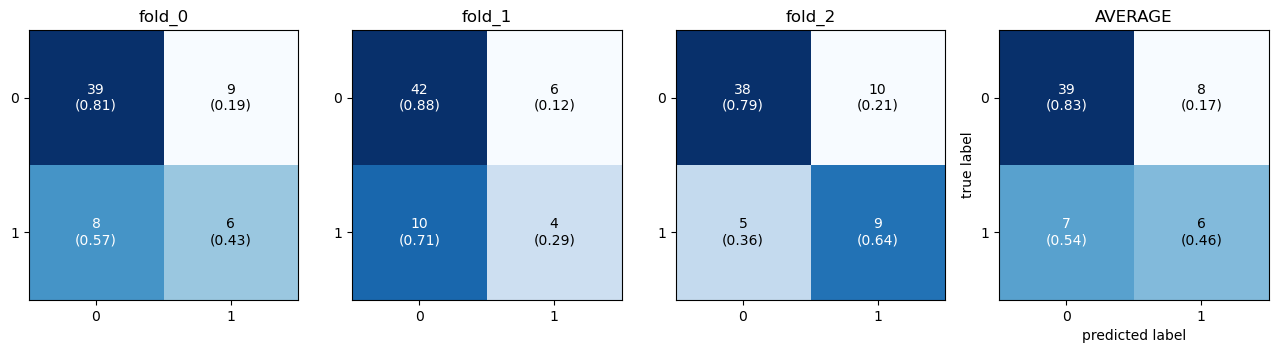

In [105]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for matrix in range(len(cms)):
    #print(matrix)
    plot_confusion_matrix(conf_mat=cms[matrix],
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, axis = axes[matrix], figure = fig)
    axes[matrix].set_title('fold_' + str(matrix))

meanCM = np.mean(cms,axis=0).astype(np.int16)
plot_confusion_matrix(conf_mat=meanCM,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, axis = axes[len(cms)], figure = fig)
axes[len(cms)].set_title('AVERAGE')

# Feature selection techniques

## Embedded methods 
* Decition tree

In [106]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

In [107]:
import dtreeviz.trees

In [108]:
import dtreeviz

Decision Tree


c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


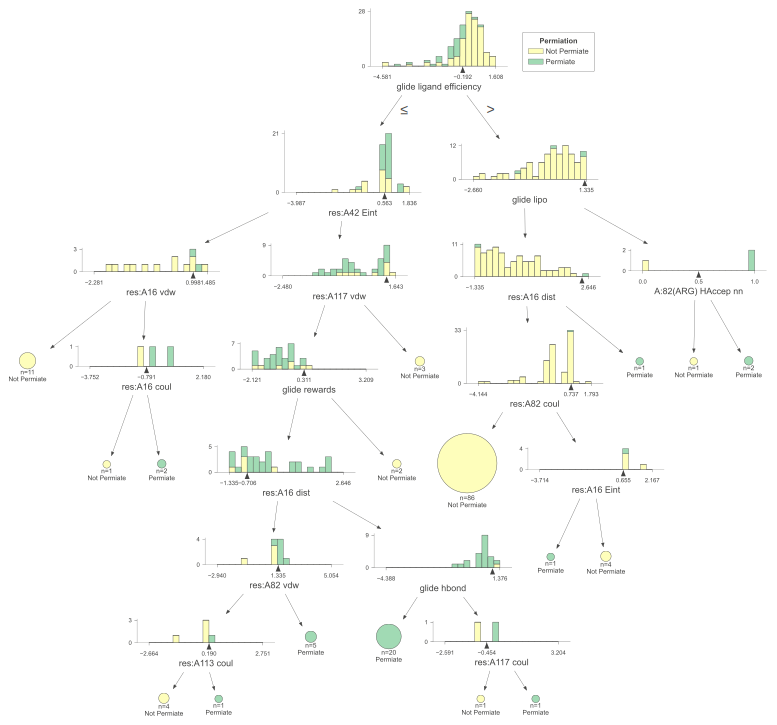

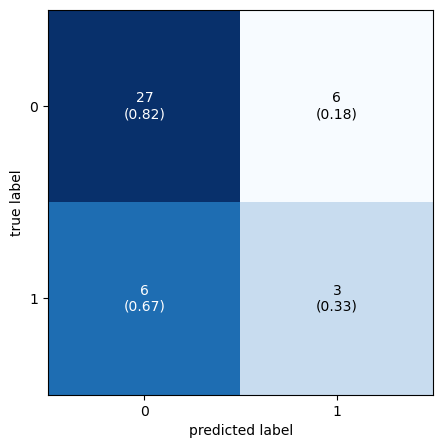

In [109]:
from sklearn.tree import plot_tree

for test_size_x in [0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        if name == 'Decision Tree':
            print(name)
            model.fit(X_train, y_train)

            #plot_tree(model, filled=True, rounded=True) 
            #plt.show()
            viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='Permiation',
                           class_names=['Not Permiate', 'Permiate'],)
            
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)
            plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)


            

viz_model.view()
            

## Filter methods

* Variance threshold

The var() method calculates the standard deviation for each column.

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_X_class = scaler.fit_transform(X_class)

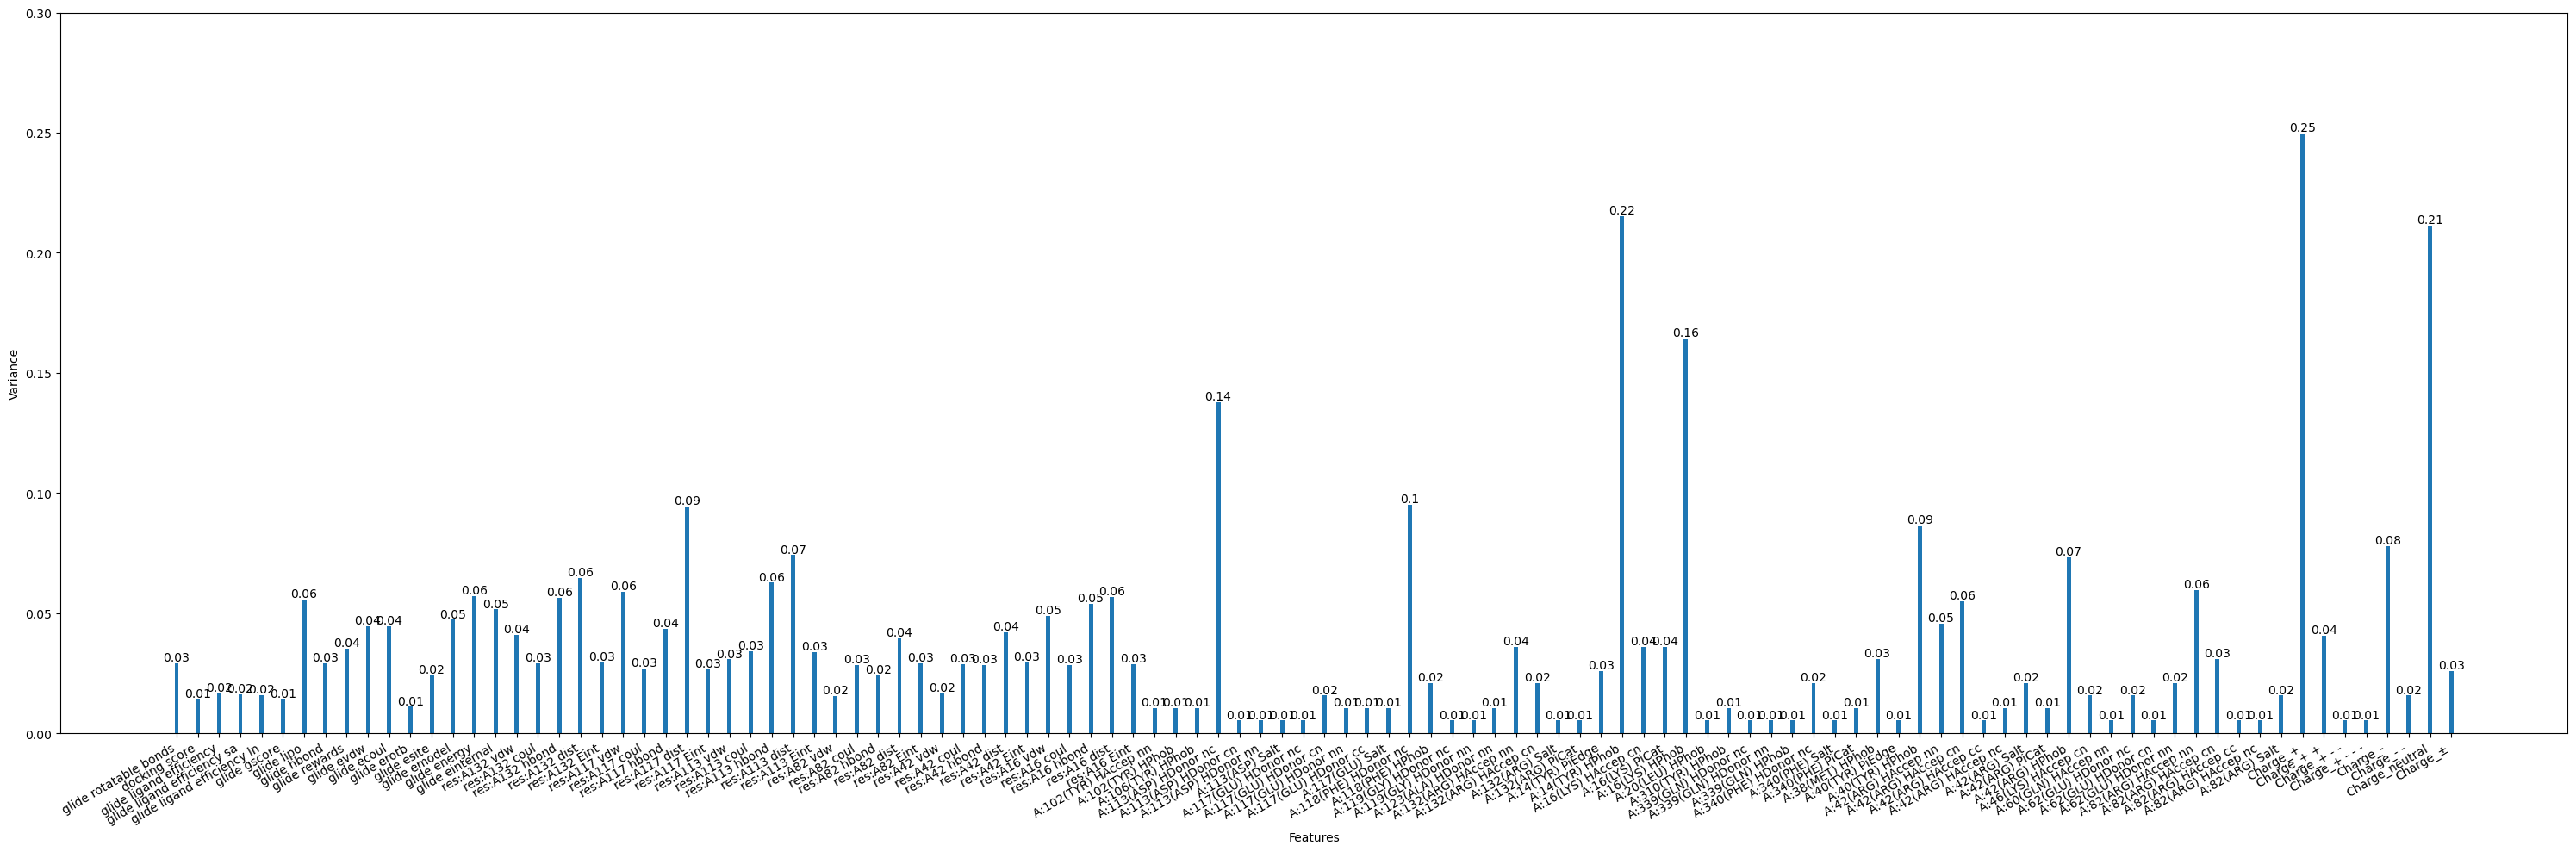

In [111]:
fig, ax = plt.subplots(figsize = (30,10))

x = X_class.columns 
y = scaled_X_class.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 2)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [112]:
d = {'Feature': X_class.columns .tolist() ,'Variance': scaled_X_class.var(axis=0).tolist()}
Feature_Variance = pd.DataFrame(d)

important_features = Feature_Variance[Feature_Variance['Variance'] >= 0.05]
variance_features = important_features['Feature'].tolist()
print(len(variance_features))
variance_features

22


['glide lipo',
 'glide energy',
 'glide einternal',
 'res:A132 hbond',
 'res:A132 dist',
 'res:A117 vdw',
 'res:A117 dist',
 'res:A113 hbond',
 'res:A113 dist',
 'res:A16 hbond',
 'res:A16 dist',
 'A:113(ASP) HDonor nc',
 'A:118(PHE) HDonor nc',
 'A:14(TYR) HPhob',
 'A:16(LYS) HPhob',
 'A:40(TYR) HPhob',
 'A:42(ARG) HAccep cn',
 'A:42(ARG) HPhob',
 'A:82(ARG) HAccep nn',
 'Charge_+',
 'Charge_-',
 'Charge_neutral']

In [113]:
X_fea = X_class[variance_features]

In [114]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_fea, Y_class)

5

In [115]:
my_dictionary = {}
metrics = ['f1_weighted', 'accuracy', 'roc_auc', 'f1']

for name, model in models:
    
    scores = cross_validate(model, X_fea, Y_class, cv=skf, scoring=metrics)

    dict_list = []
    for type_score in ['test_f1_weighted', 'test_accuracy', 'test_roc_auc', 'test_f1']:
        variable = round(scores[type_score].mean(), 3) 
        dict_list.append(variable)


    my_dictionary[name + "_"  + 'cross_val(5)'] = dict_list

cross_val = pd.DataFrame.from_dict(my_dictionary, orient='index',
                       columns=['f1_weighted', 'accuracy', 'roc_auc', 'f1'])

new_cross_val = cross_val.rename_axis('Method').reset_index()

melt_cross_val = pd.melt(
    new_cross_val, 
    id_vars= ['Method'], 
    value_vars=('f1_weighted','accuracy', 'roc_auc', 'f1'), 
    var_name='metrics', 
    value_name='score', 
    col_level=None
)
melt_cross_val.head(7)

,Method,metrics,score
0,SVM_cross_val(5),f1_weighted,0.676
1,Random Forest_cross_val(5),f1_weighted,0.721
2,Decision Tree_cross_val(5),f1_weighted,0.690
3,KNeighbors_cross_val(5),f1_weighted,0.688
4,LogisticRegression_cross_val(5),f1_weighted,0.755
5,SVM_cross_val(5),accuracy,0.740
6,Random Forest_cross_val(5),accuracy,0.756


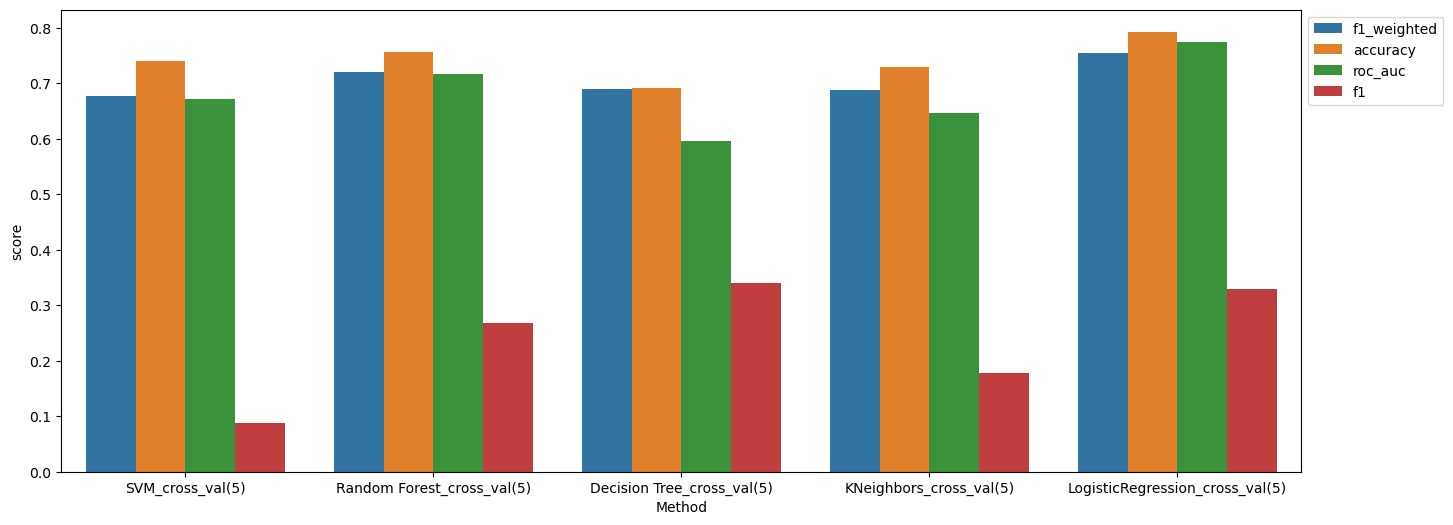

In [116]:
plt.rcParams["figure.figsize"] = [16,6]
sns.barplot(melt_cross_val, x = 'Method', y = 'score', hue = 'metrics')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Confusion matrix comparison 
### Classification methods

In [117]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

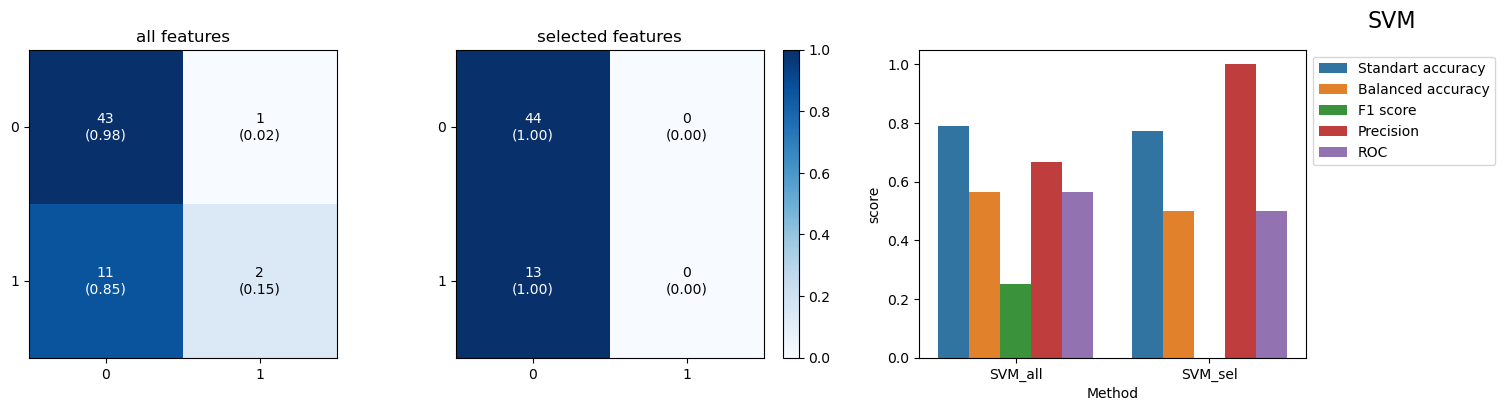

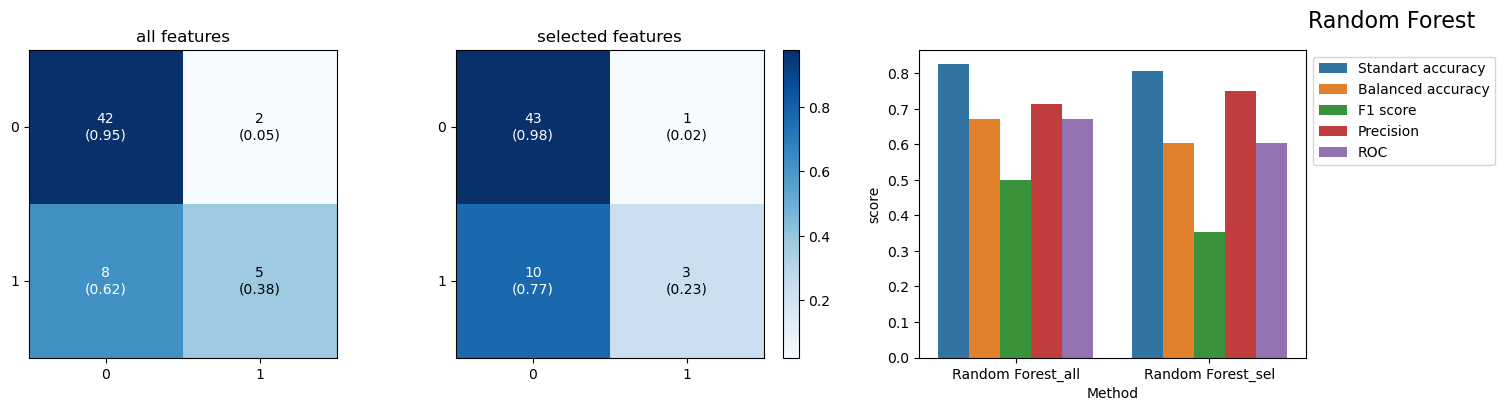

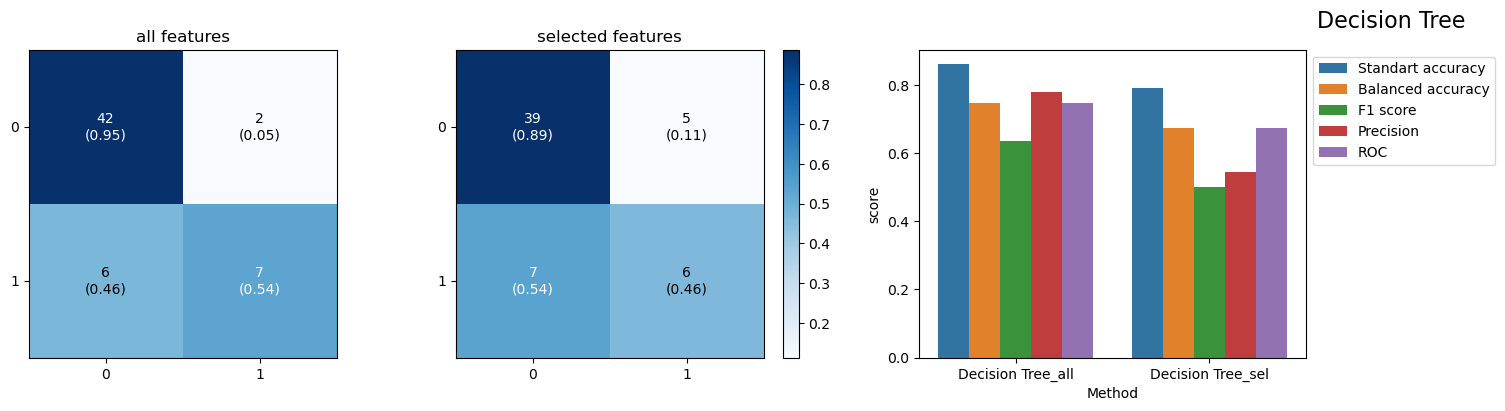

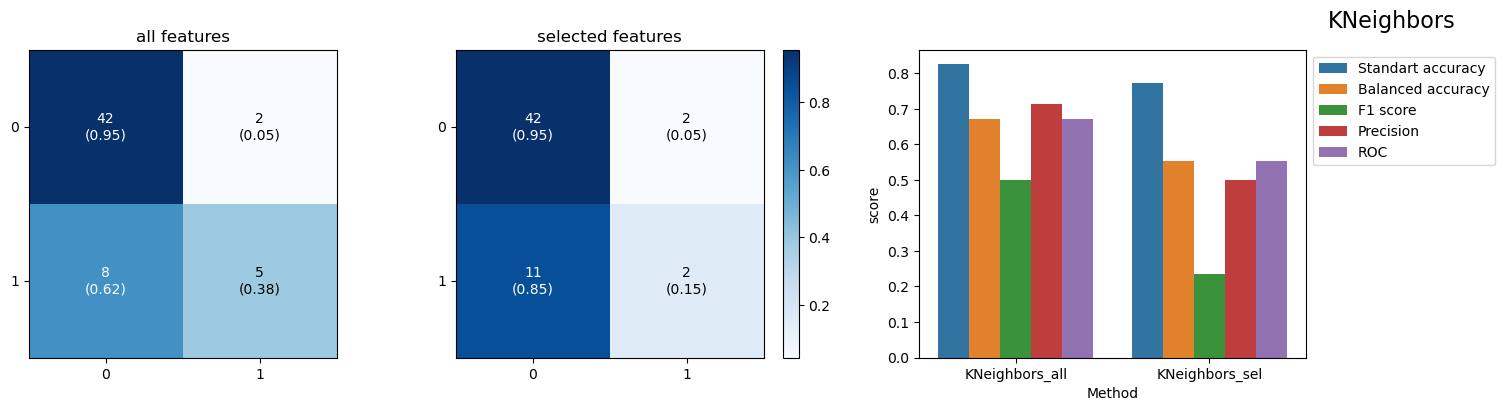

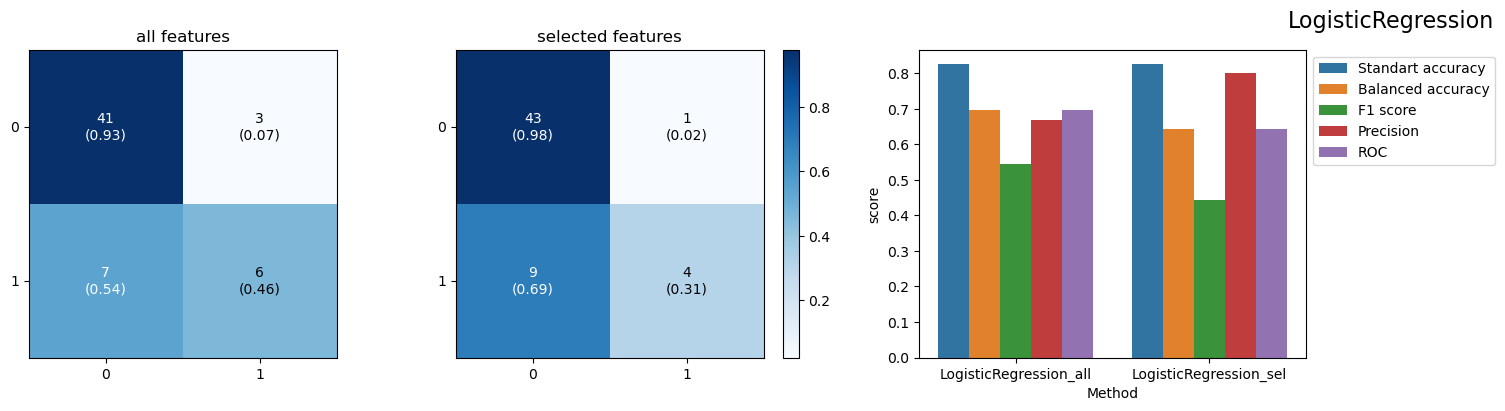

In [120]:
dict_test_train = {}
for test_size_x in [0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, classifier in models:
        #print(name)
        model = classifier
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        confmat = confusion_matrix(y_test, preds)

        #confusion matrix
        fig, axes = plt.subplots(1, 3, figsize=(17, 4))
        fig.suptitle(name, fontsize=16, x = 0.95)

        plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False, axis = axes[0], figure = fig)
    

        #model with selected features

        X_train_sel = X_train[variance_features]   
        X_test_sel = X_test[variance_features] 

        model1 = classifier
        model1.fit(X_train_sel, y_train)
        preds_sel = model1.predict(X_test_sel)
        confmat_sel = confusion_matrix(y_test, preds_sel)
 
        plot_confusion_matrix(conf_mat=confmat_sel,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True, axis = axes[1], figure = fig )  
        
        #other metrics

        #standart accuracy 
        accuracy_all = round(accuracy_score(y_test, preds), 3)
        accuracy_sel = round(accuracy_score(y_test, preds_sel), 3)

        #balanced accuracy
        bal_acc_all = round(balanced_accuracy_score(y_test,preds), 3)
        bal_acc_sel = round(balanced_accuracy_score(y_test,preds_sel), 3)

        #f1 score
        f1_score_all = round(f1_score(y_test, preds), 3)
        f1_score_sel = round(f1_score(y_test, preds_sel), 3)

        #precision
        precision_all = round(precision_score(y_test, preds, zero_division = 1), 3)
        precision_sel = round(precision_score(y_test, preds_sel, zero_division = 1), 3)

        #ROC
        ROC_all = round(roc_auc_score(y_test, preds), 3)
        ROC_sel = round(roc_auc_score(y_test, preds_sel), 3)

        dict_metrics = {}
        dict_metrics[name + "_all"] = accuracy_all, bal_acc_all, f1_score_all, precision_all, ROC_all
        dict_metrics[name + "_sel"] = accuracy_sel, bal_acc_sel, f1_score_sel, precision_sel, ROC_sel

        metrics_dataframe = pd.DataFrame.from_dict(dict_metrics, orient='index',
                       columns=['Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'])
        new_metrics_dataframe = metrics_dataframe.rename_axis('Method').reset_index()
        melt_train_test = pd.melt(new_metrics_dataframe, 
                                  id_vars= ['Method'], 
                                  value_vars=('Standart accuracy', 'Balanced accuracy', 'F1 score', 'Precision', 'ROC'), 
                                  var_name='metrics', 
                                  value_name='score', 
                                  col_level=None
                                  )
        #print(melt_train_test)


        sns.barplot(melt_train_test, x = 'Method', y = 'score', hue = 'metrics', ax = axes[2] )
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        


        #print('Standart accuracy', accuracy_all, accuracy_sel)
        #print('Balanced accuracy', bal_acc_all, bal_acc_sel)
        #print('F1 score', f1_score_all, f1_score_sel)
        #print('Precision', precision_all, precision_sel) 
        #print('ROC', ROC_all, ROC_sel) 
        #print(dict_metrics)

        
        
        axes[0].set_title('all features')
        axes[1].set_title('selected features')

        plt.show()



Decision Tree


c:\Users\olshana1\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


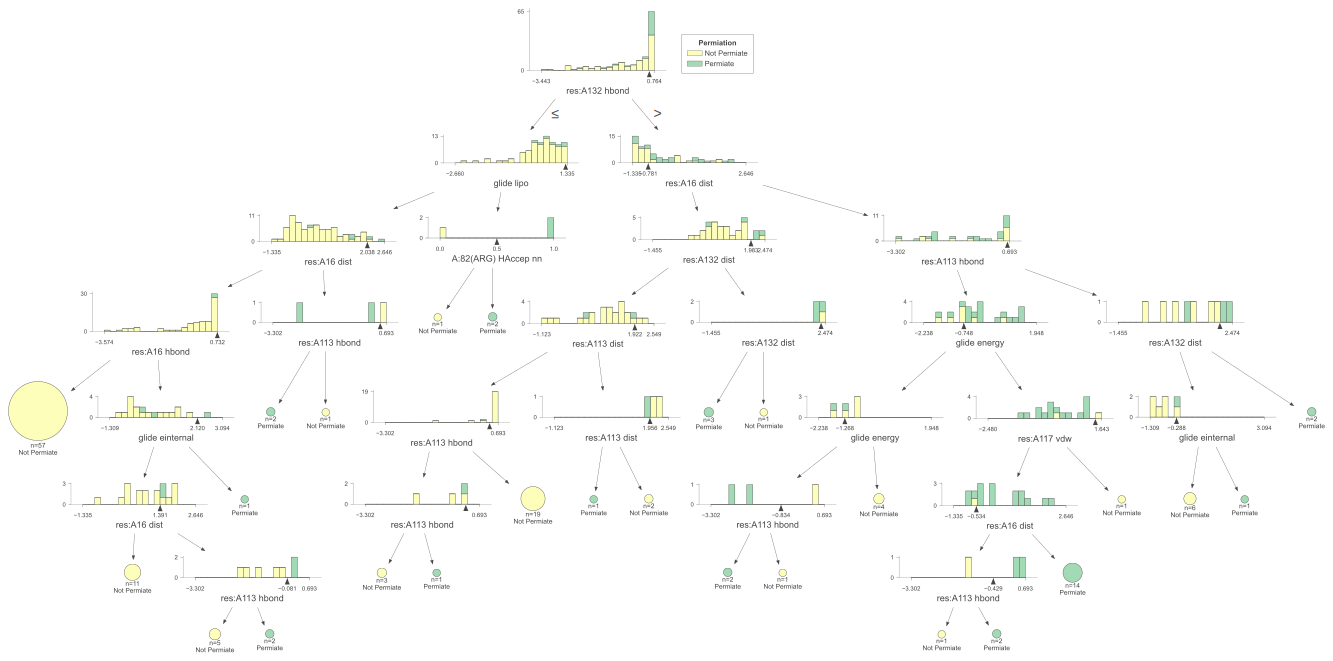

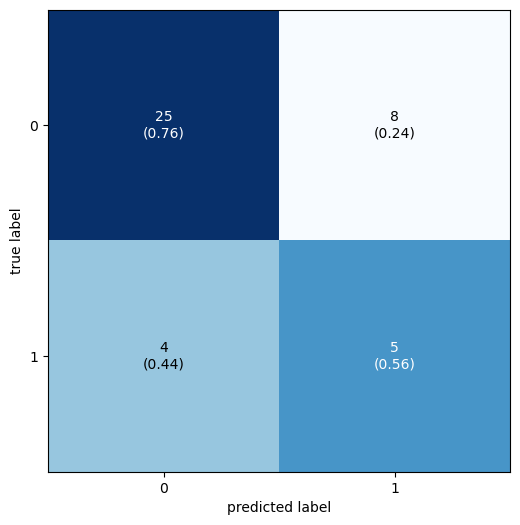

In [119]:
from sklearn.tree import plot_tree

for test_size_x in [0.22]:
    X_train, X_test, y_train, y_test = train_test_split(X_class[variance_features], 
                                                    Y_class, test_size=test_size_x, 
                                                    random_state=42, stratify=Y_class)
    #print(test_size_x)

    for name, model in models:
        if name == 'Decision Tree':
            print(name)
            model.fit(X_train, y_train)

            #plot_tree(model, filled=True, rounded=True) 
            #plt.show()
            viz_model = dtreeviz.model(model,
                           X_train=X_train, y_train=y_train,
                           feature_names=X_train.columns,
                           target_name='Permiation',
                           class_names=['Not Permiate', 'Permiate'],)
            
            preds = model.predict(X_test)
            confmat = confusion_matrix(y_test, preds)
            plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=False)


            

viz_model.view()
            

### Lasso

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_class, 
                                                    Y_class, test_size=0.22, 
                                                    random_state=42, stratify=Y_class)
   

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.875


In [66]:
coef = lr.coef_[0].tolist()
feature_a = X_class.columns.tolist()

for n in range(len(lr.coef_[0].tolist())):
    print(coef[n], feature_a[n])


0.0 glide rotatable bonds
0.0 docking score
0.0 glide ligand efficiency
0.0 glide ligand efficiency sa
0.0 glide ligand efficiency ln
0.0 glide gscore
0.0 glide lipo
0.4552736618370785 glide hbond
-0.2836755207321703 glide rewards
0.0 glide evdw
0.0 glide ecoul
0.0 glide erotb
0.3945917029582751 glide esite
0.0 glide emodel
0.0 glide energy
0.0 glide einternal
0.0 res:A132 vdw
0.0 res:A132 coul
0.6428769381584848 res:A132 hbond
0.0 res:A132 dist
0.0 res:A132 Eint
0.0 res:A117 vdw
0.0 res:A117 coul
0.0 res:A117 hbond
0.0 res:A117 dist
0.0 res:A117 Eint
0.0 res:A113 vdw
0.0 res:A113 coul
0.0 res:A113 hbond
0.0 res:A113 dist
0.0 res:A113 Eint
0.290417981966445 res:A82 vdw
0.0 res:A82 coul
0.0 res:A82 hbond
0.0 res:A82 dist
0.0 res:A82 Eint
0.0 res:A42 vdw
0.0 res:A42 coul
0.0 res:A42 hbond
0.0 res:A42 dist
0.0 res:A42 Eint
0.0 res:A16 vdw
0.0 res:A16 coul
0.0 res:A16 hbond
0.43071073837499657 res:A16 dist
0.0 res:A16 Eint
0.0 A:113(ASP) HDonor nn
0.0 A:113(ASP) HDonor nc
0.0 A:113(ASP) HD

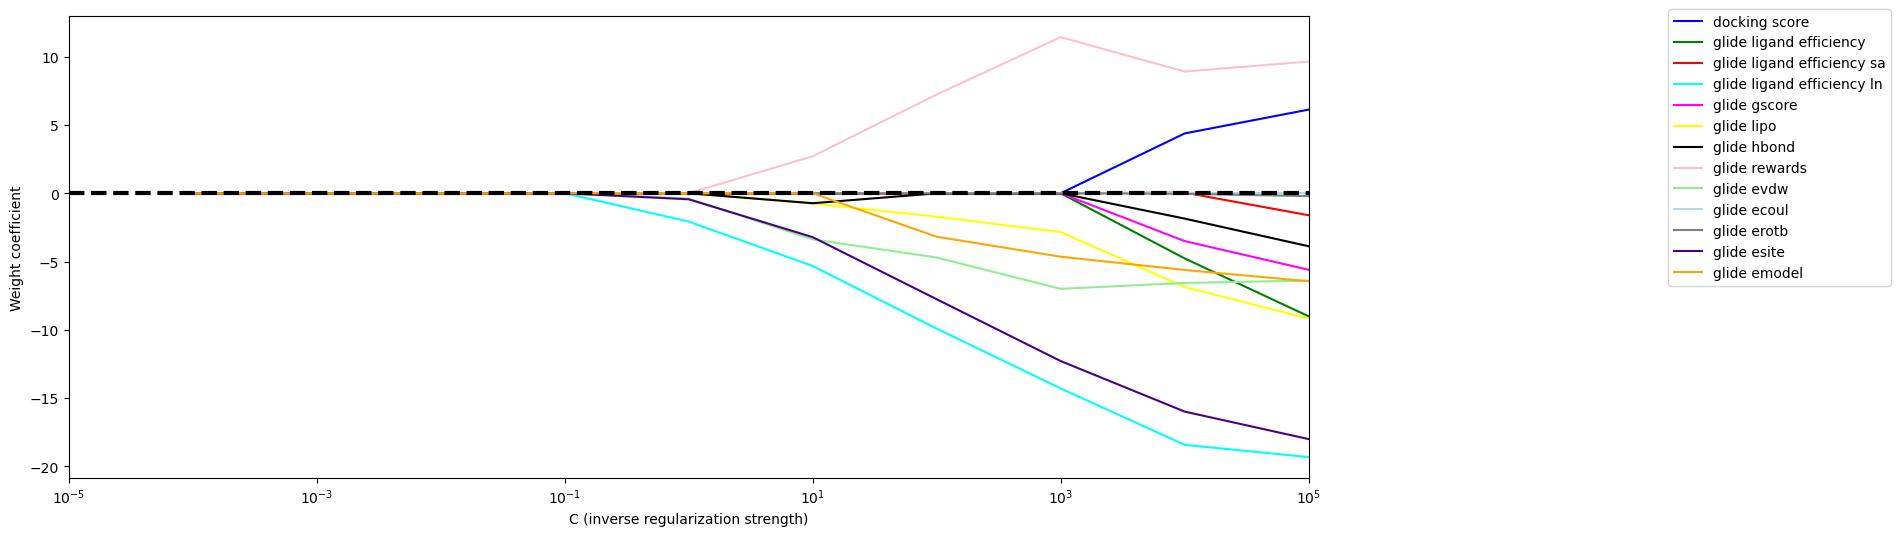

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train[variance_features], y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=X_class.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

### Regression algorithms

In [ ]:
regression_algorithms = [['Random Forest Reg', RandomForestRegressor(random_state=42)],
                         ['Decision Tree Reg', DecisionTreeRegressor(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()],
 ['LogisticRegression', LogisticRegression(random_state=42)]]

In [339]:
rand_for_reg = DecisionTreeRegressor(random_state=42)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, 
                                                    Y_class, test_size=0.22, 
                                                    random_state=42, stratify=Y_class)

In [340]:
rand_for_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [341]:
y_predict = rand_for_reg.predict(X_test)

In [342]:
r2_score(y_test, y_predict)

-2.4285714285714284

#### RFE

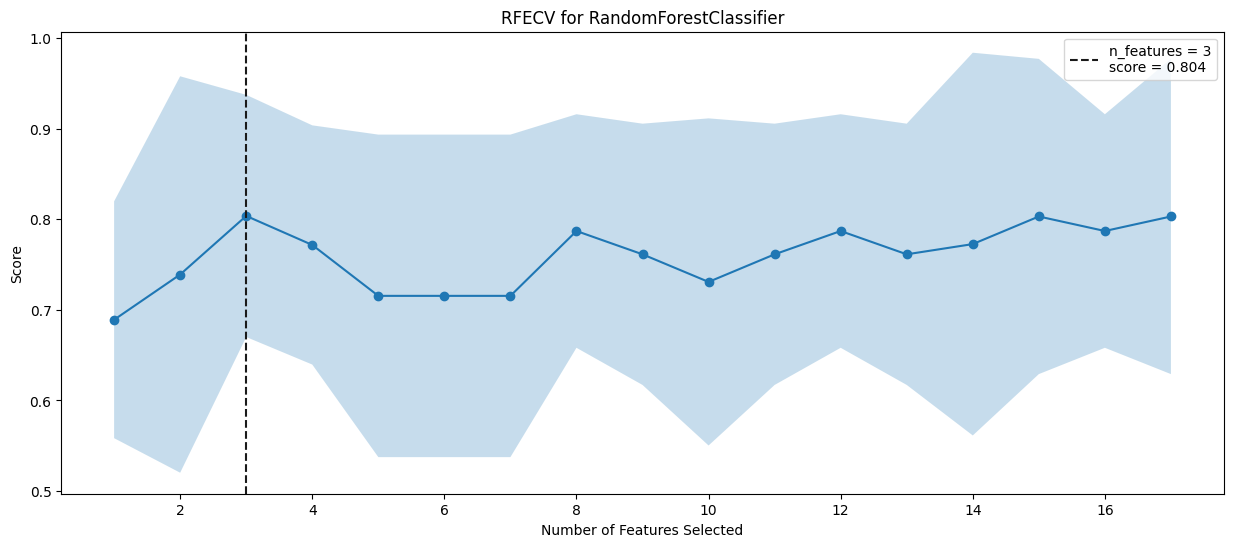

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [700]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state=42), cv=cv, scoring='f1_weighted')
visualizer.fit(X_fea, Y_class) 
visualizer.show()

In [701]:
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

Index(['A:132(ARG) HAccep nn', 'A:82(ARG) HAccep nn', 'Charge_±'], dtype='object')


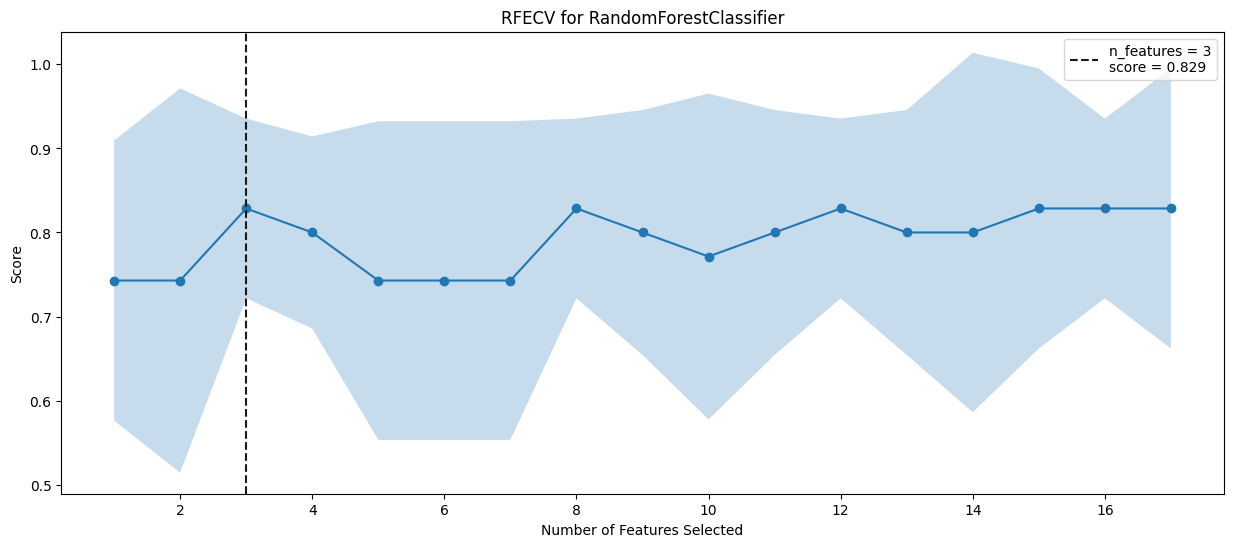

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [702]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(random_state=42), cv=cv, scoring='accuracy')
visualizer.fit(X_fea, Y_class) 
visualizer.show()

In [703]:
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

Index(['A:132(ARG) HAccep nn', 'A:82(ARG) HAccep nn', 'Charge_±'], dtype='object')


In [704]:
models

[['SVM', SVC()],
 ['Random Forest', RandomForestClassifier(random_state=42)],
 ['Decision Tree', DecisionTreeClassifier(random_state=42)],
 ['KNeighbors', KNeighborsClassifier()]]

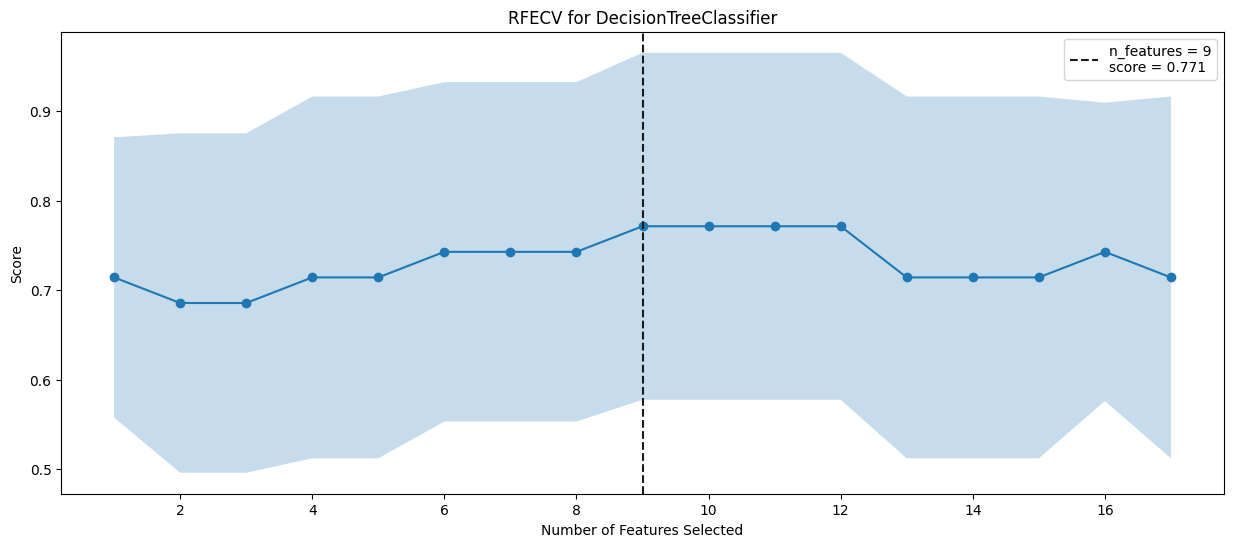

Index(['A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:310(TYR) HPhob',
       'A:82(ARG) HAccep nn', 'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-',
       'Charge_- - ', 'Charge_±'],
      dtype='object')


In [705]:
cv = StratifiedKFold(5)
visualizer = RFECV(DecisionTreeClassifier(random_state=42), cv=cv, scoring='accuracy')
visualizer.fit(X_fea, Y_class) 
visualizer.show()
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

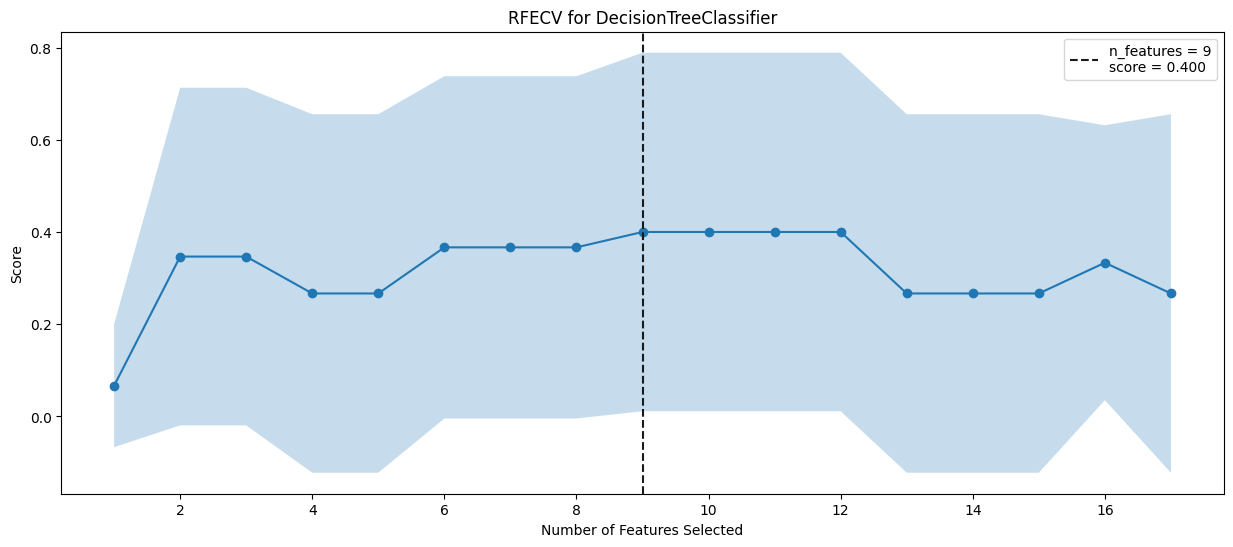

Index(['A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:310(TYR) HPhob',
       'A:82(ARG) HAccep nn', 'A:82(ARG) Salt', 'Charge_+ - -', 'Charge_-',
       'Charge_- - ', 'Charge_±'],
      dtype='object')


In [707]:
cv = StratifiedKFold(5)
visualizer = RFECV(DecisionTreeClassifier(random_state=42), cv=cv, scoring='f1')
visualizer.fit(X_fea, Y_class) 
visualizer.show()
selected_features_mask = visualizer.get_support()
selected_features = X_fea.columns[selected_features_mask]
print(selected_features)

# Initialize classifier

F1 = 2 * (precision * recall) / (precision + recall)

## Recursive feature elimination (RFE) 

In [86]:
from sklearn.feature_selection import RFE

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 75):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train_v3, y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 2)
    
    rfe_f1_score_list.append(f1_score_rfe)

fig, ax = plt.subplots(figsize = (30,10))

x = np.arange(1, 75)
y = rfe_f1_score_list

ax.bar(x, y, width=0.1)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 75))
ax.set_xticklabels(np.arange(1, 75), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+0.5, y=v+0.03, s=str(v), ha='center')
    
plt.tight_layout()

RFE_selector = RFE(estimator=gbc, n_features_to_select=20, step=10)
RFE_selector.fit(X_train_v3, y_train_v3)

selected_features_mask = RFE_selector.get_support()
selected_features_mask

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

In [87]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 302, in _fit
    importances = _get_feature_importances(
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_base.py", line 208, in _get_feature_importances
    raise ValueError(
ValueError: when `importance_getter=='auto'`, the underlying estimator SVC should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


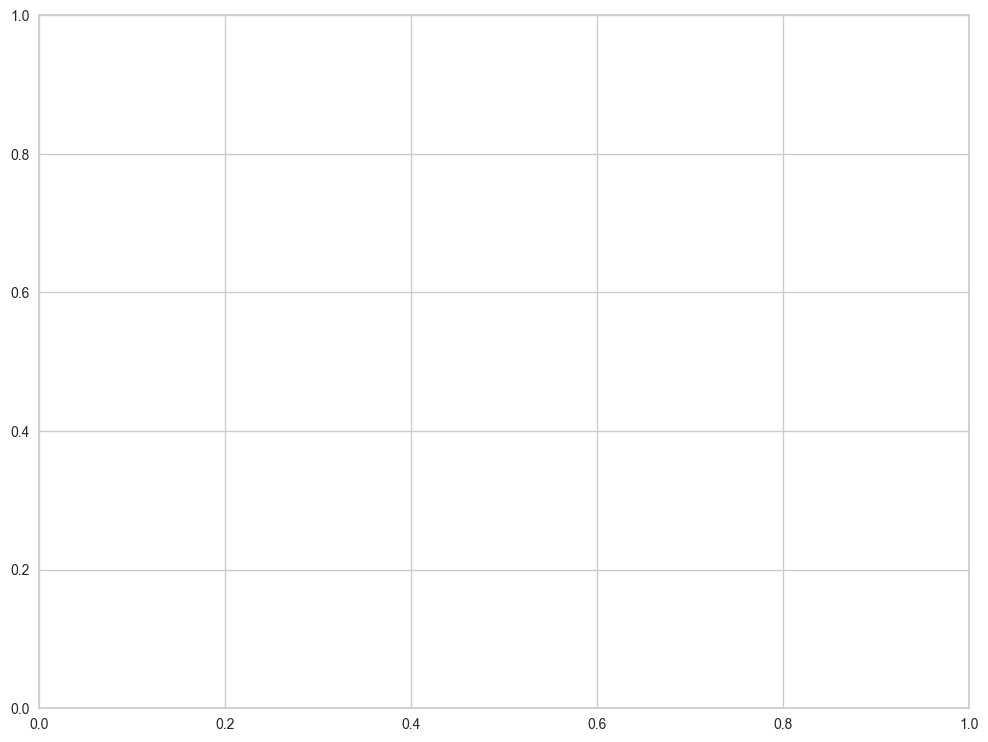

In [396]:
for name, model in models:
    cv = StratifiedKFold(5)
    visualizer = RFECV(model, cv=cv, scoring='f1_weighted')
    visualizer.fit(X_class, Y_class) 
    print(name)
    visualizer.show()

    #selected_features_mask = visualizer.get_support()
    #selected_features = X_class.columns[selected_features_mask]
    #print(selected_features)    

Random Forest


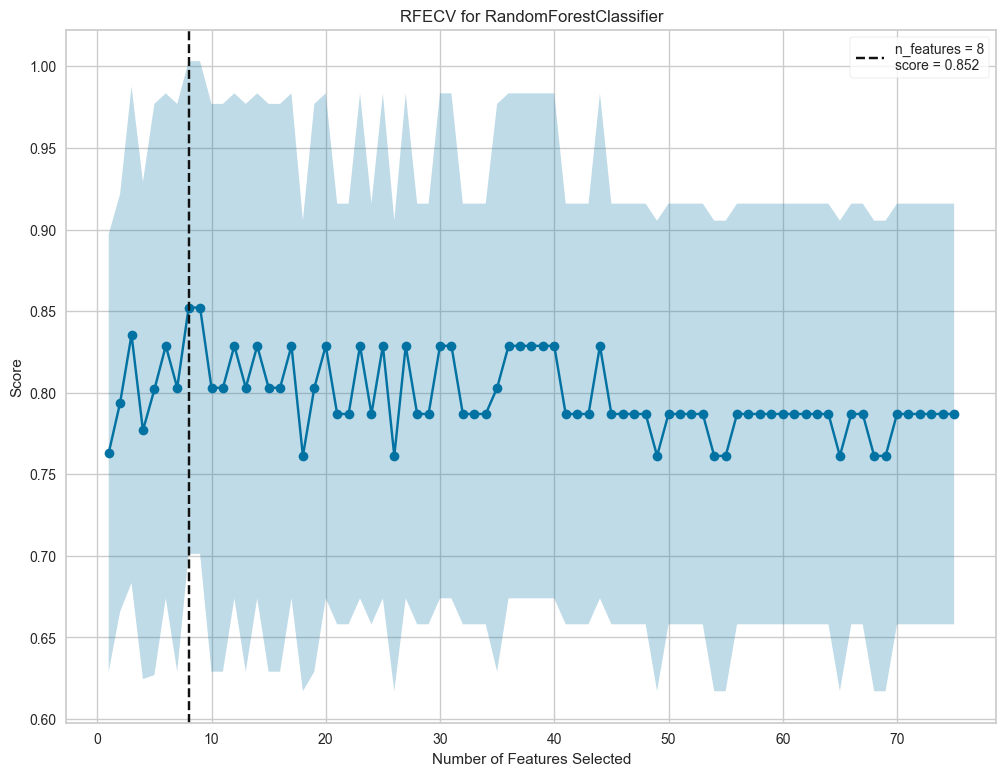

Index(['glide ligand efficiency', 'glide hbond', 'glide rewards',
       'glide esite', 'res:A132 hbond', 'res:A132 dist', 'res:A16 coul',
       'res:A16 Eint'],
      dtype='object')
Decision Tree


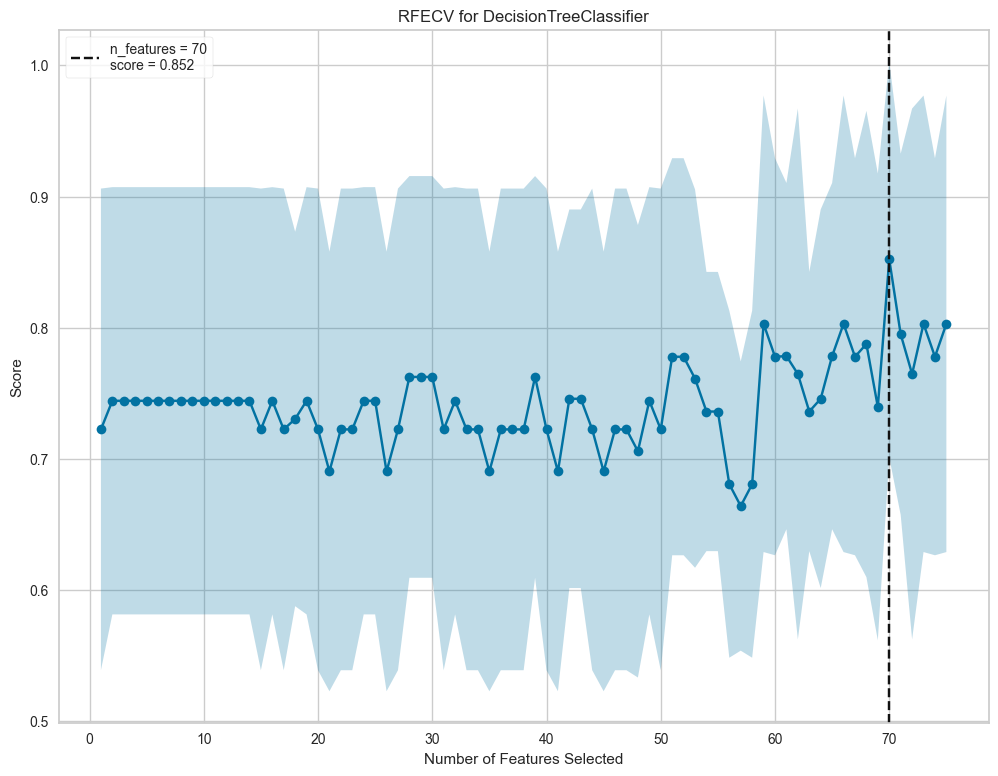

Index(['glide ligand efficiency ln', 'glide gscore', 'glide lipo',
       'glide hbond', 'glide rewards', 'glide evdw', 'glide ecoul',
       'glide erotb', 'glide esite', 'glide emodel', 'glide energy',
       'glide einternal', 'res:A132 vdw', 'res:A132 coul', 'res:A132 hbond',
       'res:A132 dist', 'res:A132 Eint', 'res:A117 vdw', 'res:A117 coul',
       'res:A117 hbond', 'res:A117 dist', 'res:A117 Eint', 'res:A113 vdw',
       'res:A113 coul', 'res:A113 hbond', 'res:A113 dist', 'res:A113 Eint',
       'res:A82 vdw', 'res:A82 coul', 'res:A82 hbond', 'res:A82 dist',
       'res:A82 Eint', 'res:A42 vdw', 'res:A42 coul', 'res:A42 dist',
       'res:A42 Eint', 'res:A16 vdw', 'res:A16 coul', 'res:A16 hbond',
       'res:A16 dist', 'res:A16 Eint', 'A:113(ASP) HDonor nn',
       'A:113(ASP) HDonor nc', 'A:113(ASP) HDonor cc', 'A:113(ASP) Salt',
       'A:118(PHE) HDonor nc', 'A:119(GLY) HDonor nc', 'A:121(ASP) HDonor cn',
       'A:132(ARG) HAccep cn', 'A:132(ARG) HAccep nn', 'A:132(ARG)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 251, in fit
    return self._fit(X, y, **fit_params)
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_rfe.py", line 302, in _fit
    importances = _get_feature_importances(
  File "C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_selection\_base.py", line 208, in _get_feature_importances
    raise ValueError(
ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.


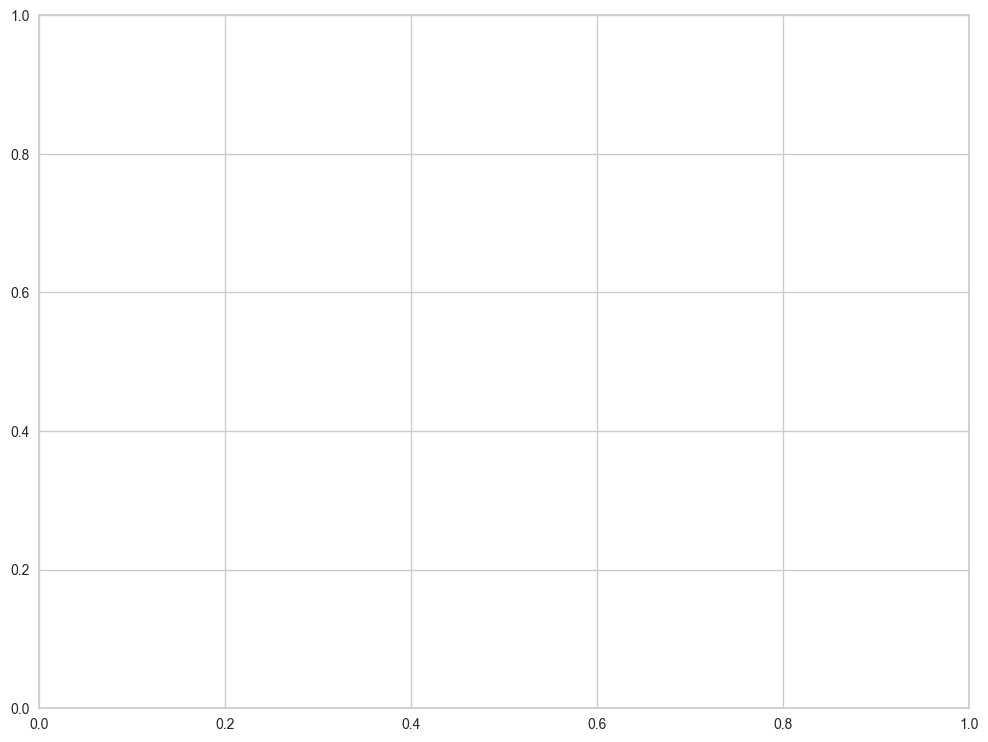

In [393]:
for name, model in models:
    cv = StratifiedKFold(5)
    visualizer = RFECV(model, cv=cv, scoring='f1_weighted')
    visualizer.fit(X_class, Y_class) 
    print(name)
    visualizer.show()

    selected_features_mask = visualizer.get_support()
    selected_features = X_class.columns[selected_features_mask]
    print(selected_features)    

In [89]:
selected_features_mask = visualizer.get_support()
selected_features_mask

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['glide hbond', 'glide rewards', 'glide esite', 'res:A132 hbond',
       'res:A132 dist', 'res:A16 coul', 'res:A16 hbond', 'res:A16 Eint'],
      dtype='object')

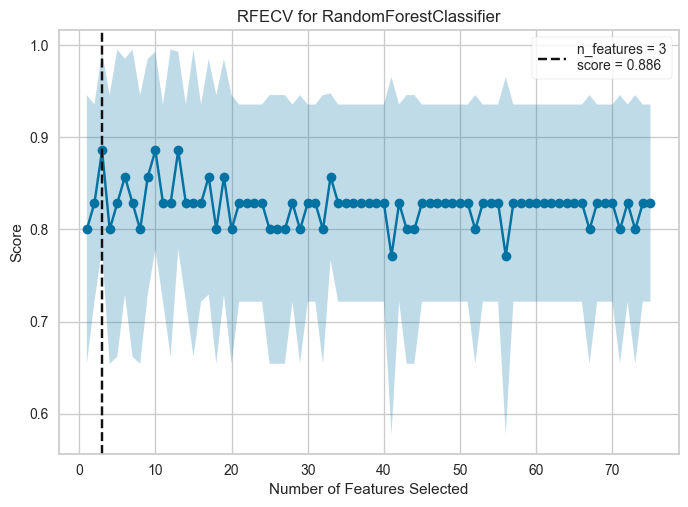

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [45]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='accuracy')

visualizer.fit(X_class, Y_class)
visualizer.show()   

In [70]:
selected_features_mask = visualizer.get_support()
selected_features_mask

selected_features = X_train_v3.columns[selected_features_mask]
selected_features

Index(['glide esite', 'res:A132 hbond', 'res:A132 dist'], dtype='object')

# Feature selection techniques
## Variance threshold

In [48]:
X_train_v1, X_test_v1, y_tain_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [303]:
# Calculate the variance of each feature
X_class.var(axis=0)

glide rotatable bonds         1.029412
docking score                 1.029412
glide ligand efficiency       1.029412
glide ligand efficiency sa    1.029412
glide ligand efficiency ln    1.029412
                                ...   
A:82(ARG) Salt                0.104202
Charge_+ - -                  0.164706
Charge_-                      0.252101
Charge_- -                    0.126050
Charge_±                      0.181513
Length: 75, dtype: float64

In [304]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_class = scaler.fit_transform(X_class)

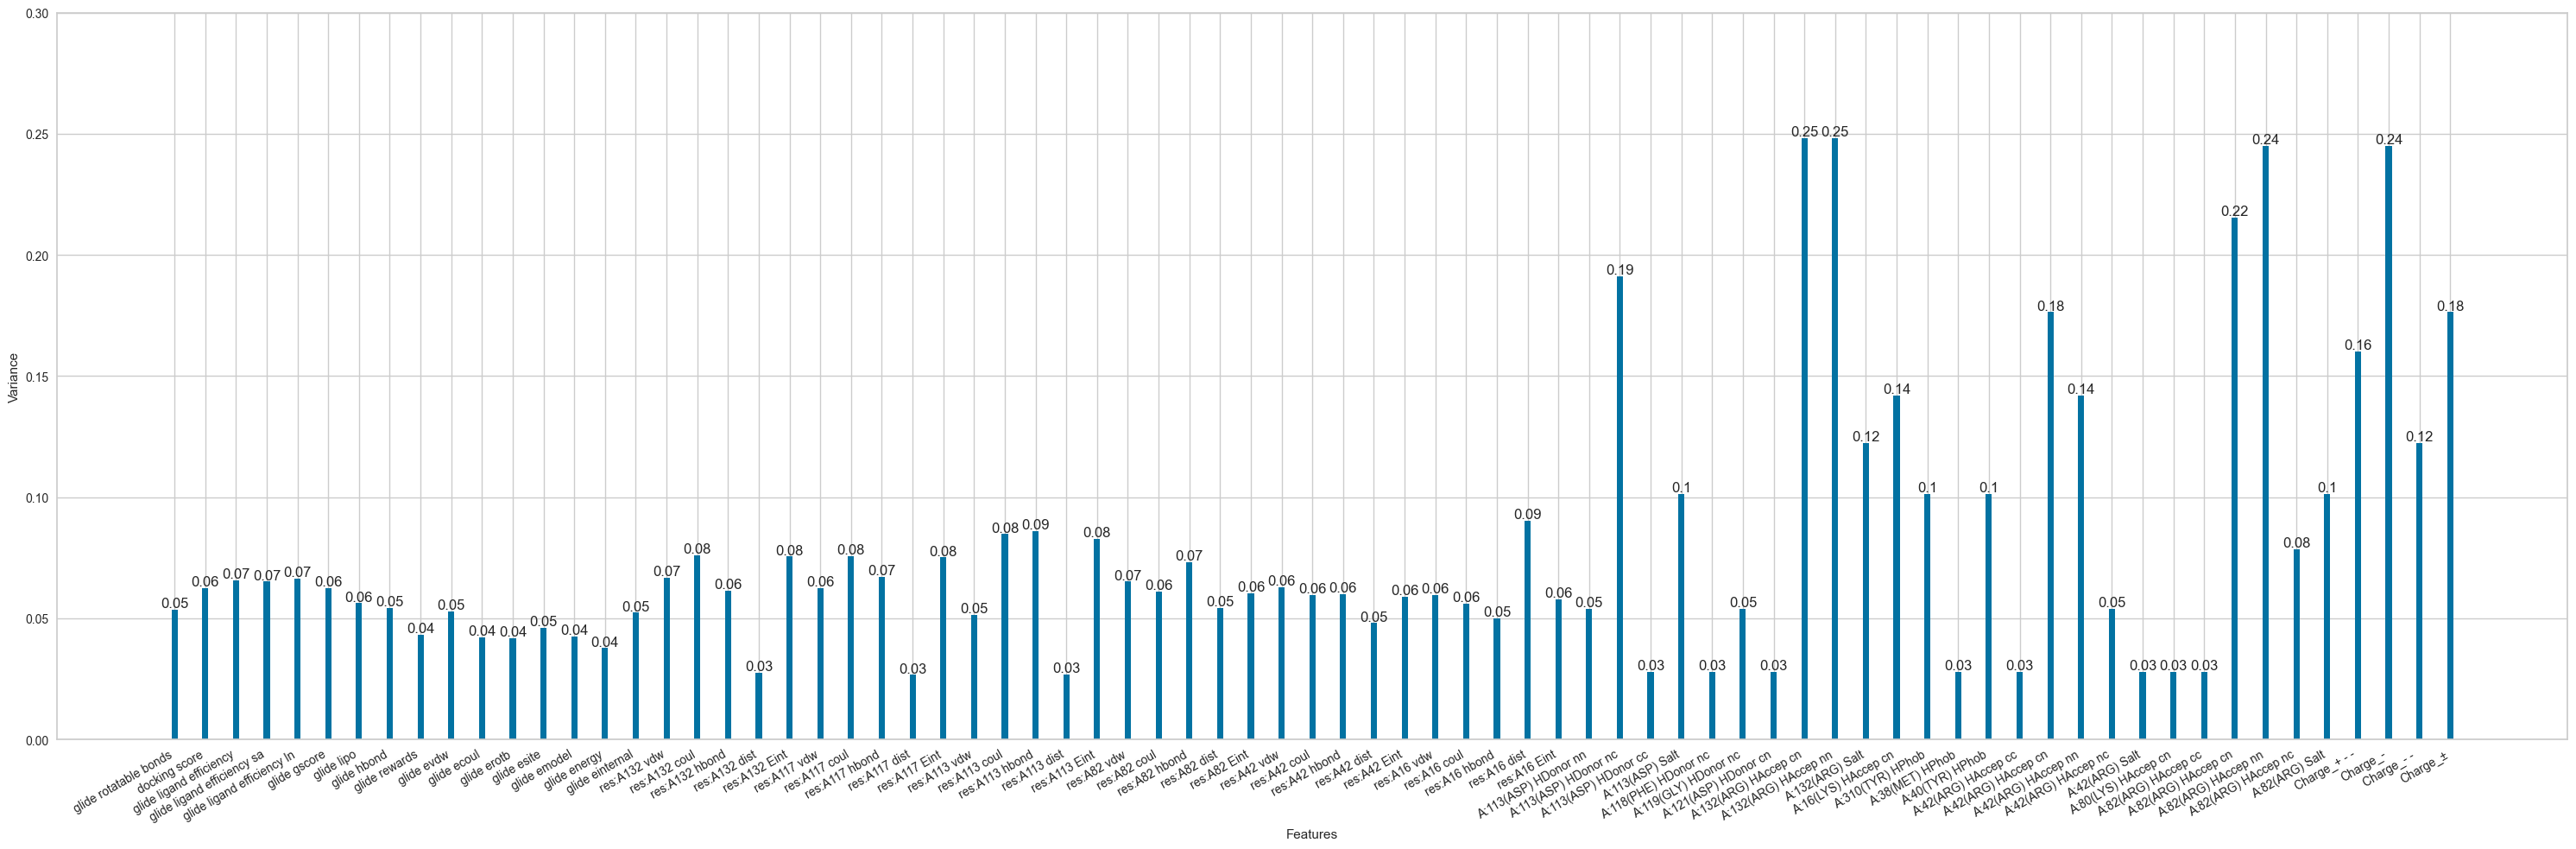

In [305]:
fig, ax = plt.subplots(figsize = (30,10))

x = X_class.columns 
y = scaled_X_class.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.3)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 2)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [387]:
d = {'Feature': X_class.columns .tolist() ,'Variance': scaled_X_class.var(axis=0).tolist()}
Feature_Variance = pd.DataFrame(d)

important_features = Feature_Variance[Feature_Variance['Variance'] >= 0.1]
variance_features = important_features['Feature'].tolist()
variance_features

['A:113(ASP) HDonor nc',
 'A:113(ASP) Salt',
 'A:132(ARG) HAccep cn',
 'A:132(ARG) HAccep nn',
 'A:132(ARG) Salt',
 'A:16(LYS) HAccep cn',
 'A:310(TYR) HPhob',
 'A:40(TYR) HPhob',
 'A:42(ARG) HAccep cn',
 'A:42(ARG) HAccep nn',
 'A:82(ARG) HAccep cn',
 'A:82(ARG) HAccep nn',
 'A:82(ARG) Salt',
 'Charge_+ - -',
 'Charge_-',
 'Charge_- - ',
 'Charge_±']

In [389]:
X_fea = X_class[variance_features]

In [390]:
from sklearn.model_selection import StratifiedKFold

skff = StratifiedKFold(n_splits=5)
skff.get_n_splits(X_fea, Y_class)

5

In [391]:
for name, model in models:
    print(name)
    #"roc_auc", "f1", "precision", "recall", "accuracy", 
    for score in ['f1_weighted', 'accuracy', 'roc_auc', 'f1']:
        cvs = cross_val_score(model, X_fea, Y_class, scoring=score, cv=skf)
        
        print(score + " : "+ str(cvs) + "  " + 'Average :', round(np.average(cvs), 5))
       
    print('\n')

Random Forest
f1_weighted : [1.         1.         0.62857143 0.79120879 0.5952381 ]  Average : 0.803
accuracy : [1.         1.         0.57142857 0.85714286 0.71428571]  Average : 0.82857
roc_auc : [1.         1.         1.         0.66666667 0.4       ]  Average : 0.81333
f1 : [1.  1.  0.4 0.  0. ]  Average : 0.48


Decision Tree
f1_weighted : [1.         0.62337662 0.47619048 0.79120879 0.5952381 ]  Average : 0.6972
accuracy : [1.         0.57142857 0.42857143 0.85714286 0.71428571]  Average : 0.71429
roc_auc : [1.         0.33333333 0.66666667 0.5        0.5       ]  Average : 0.6
f1 : [1.         0.         0.33333333 0.         0.        ]  Average : 0.26667


KNeighbors
f1_weighted : [1.         1.         0.87445887 0.79120879 0.51948052]  Average : 0.83703
accuracy : [1.         1.         0.85714286 0.85714286 0.57142857]  Average : 0.85714
roc_auc : [1.         1.         1.         0.91666667 0.4       ]  Average : 0.86333
f1 : [1.         1.         0.66666667 0.         0

In [392]:
for name, model in models:
    print(name)
    # Variables for average classification report
    originalclass = []
    predictedclass = []

    #Make our customer score
    def classification_report_with_accuracy_score(y_true, y_pred):
        originalclass.extend(y_true)
        predictedclass.extend(y_pred)
        return accuracy_score(y_true, y_pred) # return accuracy score


    # Nested CV with parameter optimization
    nested_score = cross_val_score(model, X=X_fea, y=Y_class, cv=skff, scoring=make_scorer(classification_report_with_accuracy_score))

    # Average values in classification report for all folds in a K-fold Cross-validation  
    print(classification_report(originalclass, predictedclass)) 

Random Forest
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.50      0.50      0.50         6

    accuracy                           0.83        35
   macro avg       0.70      0.70      0.70        35
weighted avg       0.83      0.83      0.83        35

Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.25      0.33      0.29         6

    accuracy                           0.71        35
   macro avg       0.55      0.56      0.55        35
weighted avg       0.75      0.71      0.73        35

KNeighbors
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.60      0.50      0.55         6

    accuracy                           0.86        35
   macro avg       0.75      0.72      0.73        35
weighted avg       0.85      0.86  

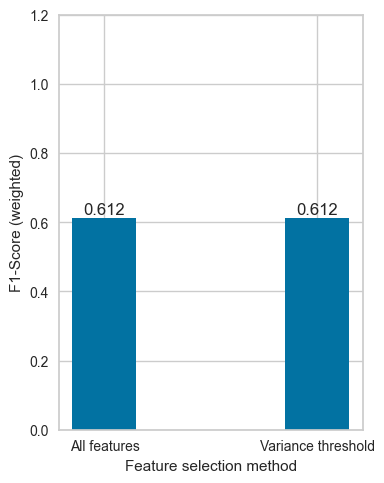

In [134]:
fig, ax = plt.subplots(figsize = (4,5))

x = ['All features', 'Variance threshold']
y = [f1_score_all, f1_score_var]

ax.bar(x, y, width=0.3)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.01, s=str(round(value,3)), ha='center')
    
plt.tight_layout()

In [147]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_train[variance_features], y_train, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[0.75  0.875 0.875]
Avg : 0.8333333333333334


In [148]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_test[variance_features], y_test, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[1.  0.5 1. ]
Avg : 0.8333333333333334


In [149]:
from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_train, y_train, cv=3)
print(score_rf)
print('Avg :', np.average(score_rf))

[0.875 1.    0.875]
Avg : 0.9166666666666666


In [152]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40), X_test, y_test, cv=6)
print(score_rf)
print('Avg :', np.average(score_rf))

C:\Users\olshana1\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=6.
  warnings.warn(


[1.  1.  0.5 0.5 1.  1. ]
Avg : 0.8333333333333334


## K-best features 

In [54]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1, 75):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train_v2, y_train_v2)
    
    sel_X_train_v2 = selector.transform(X_train_v2)
    sel_X_test_v2 = selector.transform(X_test_v2)
    
    gbc.fit(sel_X_train_v2, y_train_v2)
    kbest_preds = gbc.predict(sel_X_test_v2)
    
    f1_score_kbest = round(f1_score(y_test_v2, kbest_preds, average='weighted'), 2)
    
    f1_score_list.append(f1_score_kbest)

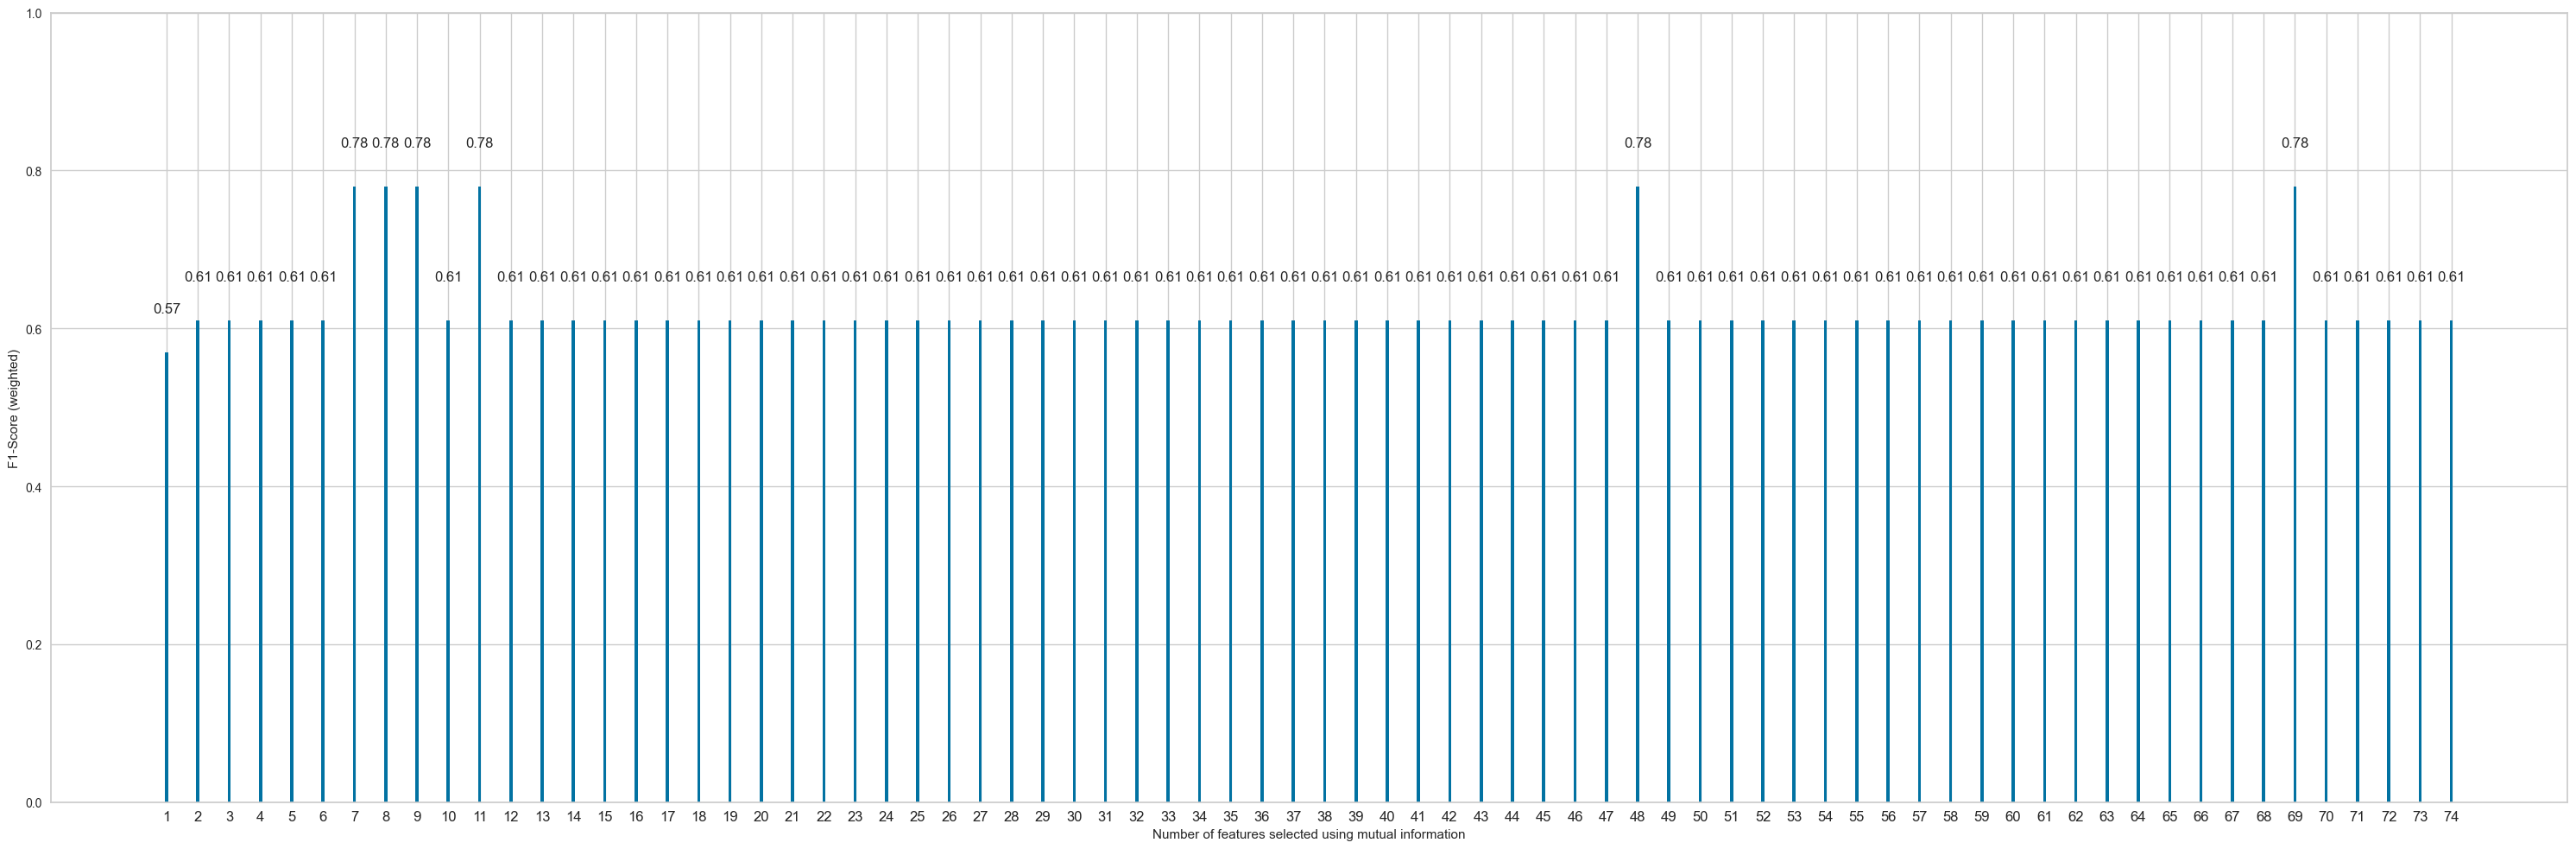

In [56]:
fig, ax = plt.subplots(figsize = (30,10))

x = np.arange(1, 75)
y = f1_score_list

ax.bar(x, y, width=0.1)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.0)
ax.set_xticks(np.arange(1, 75))
ax.set_xticklabels(np.arange(1, 75), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()

In [57]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train_v2, y_train_v2)

selected_feature_mask = selector.get_support()

selected_features = X_train_v2.columns[selected_feature_mask]

selected_features

Index(['glide rotatable bonds', 'glide rewards', 'glide evdw', 'glide erotb',
       'glide esite', 'res:A132 hbond', 'res:A132 dist', 'res:A16 hbond',
       'res:A16 dist', 'A:80(LYS) HAccep cn'],
      dtype='object')

## Boruta 

In [58]:
X_train_v4, X_test_v4, y_train_v4, y_test_v4 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [59]:
from boruta import BorutaPy

boruta_selector = BorutaPy(gbc, random_state=42)

boruta_selector.fit(X_train_v4, y_train_v4)

sel_X_train_v4 = boruta_selector.transform(X_train_v4.values)
sel_X_test_v4 = boruta_selector.transform(X_test_v4.values)

gbc.fit(sel_X_train_v4, y_train_v4)

boruta_preds = gbc.predict(sel_X_test_v4)

boruta_f1_score = round(f1_score(y_test_v4, boruta_preds, average='weighted'), 3)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
selected_features_mask = boruta_selector.support_

selected_features = X_train_v4.columns[selected_features_mask]
selected_features

Index(['malic_acid', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

NameError: name 'f1_score_var' is not defined

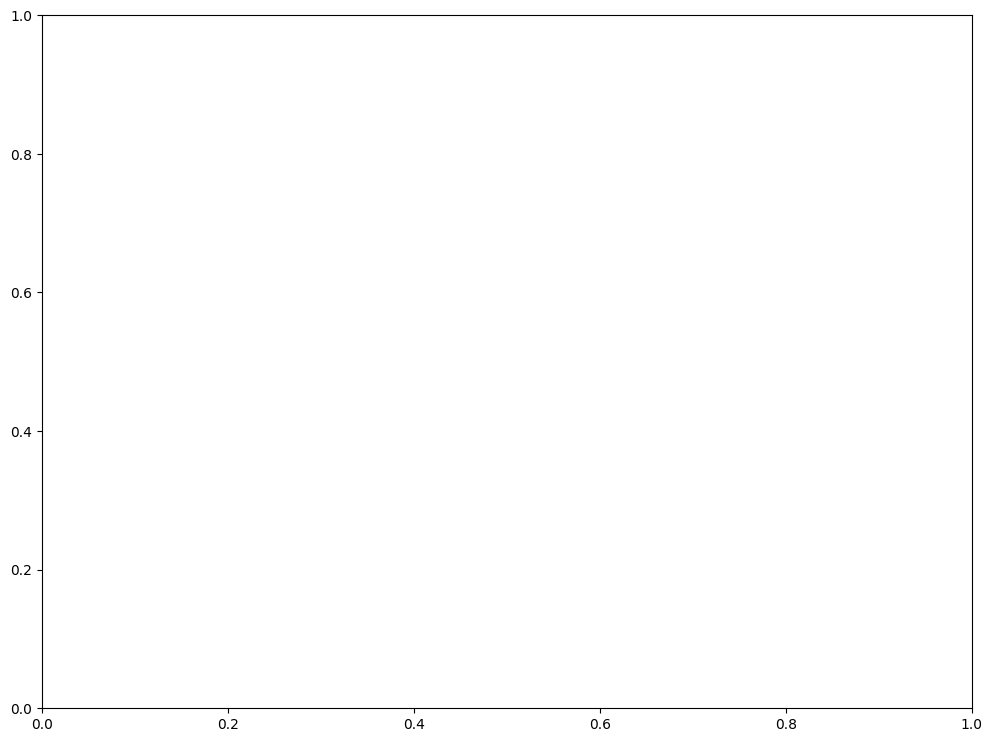

In [ ]:
fig, ax = plt.subplots()

x = ['All features (13)', 'Variance threshold (11)', 'Filter - MI (3)', 'RFE (3)', 'Boruta (9)']
y = [f1_score_all, f1_score_var, 0.981, 1.0, boruta_f1_score]

ax.bar(x, y, width=0.2)
ax.set_xlabel('Feature selection method')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)

for i, v in enumerate(y):
    plt.text(x=i, y=v+0.01, s=str(v), ha='center')
    
plt.tight_layout()